# H vs DT plots used in the paper using short and long equation considering footprint mismatch 
**In contrary to Holmes. et al 2009, the at Ts-Ta =0 H should not be 0 allowing an intercept**

In [1]:
from __future__ import division
from IPython.display import display
from sympy import diff, init_printing
init_printing() 
init_printing(use_latex='mathjax')
from sympy import diff, Eq, exp, init_printing, log, solve, sqrt
init_printing() 
from sympy.printing import StrPrinter
StrPrinter._print_Quantity = lambda self, expr: str(expr.abbrev)    # displays short units (m instead of meter)

In [2]:
# Using environmental science for symbolic math, see https://github.com/environmentalscience/essm
from essm.variables._core import BaseVariable, Variable
from essm.equations import Equation
from essm.equations.physics.thermodynamics import *
from essm.variables.units import derive_unit, SI, Quantity
from essm.variables.utils import replace_defaults, replace_variables
from sympy.physics.units import joule, kelvin,gram,kilogram,meter, mole, pascal, second
from essm.variables.utils import generate_metadata_table
from matplotlib import rc 
import matplotlib
import math
import sympy
from essm.variables.units import derive_unit, derive_baseunit, markdown, SI
from essm.variables.units import joule, kelvin, kilogram, meter, pascal, second, watt

from sympy import diff, Eq, exp, init_printing, log, solve, sqrt
import re


In [3]:
import numpy as np
from netCDF4 import Dataset
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [4]:
import glob
from netCDF4 import Dataset
import os
from sympy.printing.theanocode import theano_function

## Plot Path :

In [5]:
plt_path= '../plots'


## Brookings

In [6]:
filename = '../Data/fluxnet/AMF_US-Bkg_BASE_HH_4-1.csv'
brookframe = pd.read_csv(filename, error_bad_lines=False,  na_values=-9999, skiprows= 2)
           

In [7]:
brookframerang = pd.date_range('1/1/2004 00:00', periods=len(brookframe.index), freq='30min')
brookframe.index = brookframerang
brookframe=brookframe.replace(-9999.000000, np.nan)
brookframe["T_a"] = pd.Series(brookframe.TA + 273.15, index=brookframe.index)
brookframe['Fn']=brookframe.NETRAD
brookframe['Ws']=brookframe.WS
brookframe['Flu']=brookframe.LW_OUT
brookframe['Fld']=brookframe.LW_IN
brookframe['Fh']=brookframe.H
brookframe["en_imb"] = brookframe.Fn-(brookframe.Fh+brookframe.LE+brookframe.G)
#brookframe

In [8]:
brookframe.LE

2004-01-01 00:00:00   NaN
2004-01-01 00:30:00   NaN
2004-01-01 01:00:00   NaN
2004-01-01 01:30:00   NaN
2004-01-01 02:00:00   NaN
                       ..
2010-12-31 21:30:00   NaN
2010-12-31 22:00:00   NaN
2010-12-31 22:30:00   NaN
2010-12-31 23:00:00   NaN
2010-12-31 23:30:00   NaN
Freq: 30T, Name: LE, Length: 122736, dtype: float64

## Yatir

In [9]:
filename = '../Data/fluxnet/EFDC_L2_Flx_ILYat_2005_v03_30m.txt'

yatframe = pd.read_csv(filename, error_bad_lines=False,  na_values=-9999)
                      


In [10]:
yatframerang = pd.date_range('1/1/2005 00:00', periods=len(yatframe.index), freq='30min')
yatframe.index = yatframerang
yatframe=yatframe.replace(-9999.000000, np.nan)
yatframe["T_a"] = pd.Series(yatframe.TA + 273.15, index=yatframe.index)
yatframe['Fn']=yatframe.NETRAD
yatframe['Ws']=yatframe.WS
yatframe['Flu']=yatframe.LW_OUT
yatframe['Fld']=yatframe.LW_IN
yatframe['Fh']=yatframe.H

## Alice Spring:

In [11]:
AS = '../Data/tern/AS/' 
ASncfile = xr.open_mfdataset(AS +'/*.nc', combine='by_coords')#, combine='nested')

In [12]:
#ASncfile.info()

sitename = [ASncfile,HSncfile]
for site in sitename:
    canopy_height=site.canopy_height
    print(canopy_height)
#canopy_height=ASncfile.canopy_height
#print(canopy_height)
#'canopy_height_{0}'.format(str(sitename))=ASncfile.canopy_height
####
anopy_ht_as=ASncfile.canopy_height
can_ht=re.findall(r'\d*\.?\d+',canopy_ht_as)
can_ht=float(can_ht[0])
tower_ht=ASncfile.tower_height
wind_measure_ht = 9.25
humidi_measure_ht=11.25
k=0.667
d=(k*can_ht)
zom_as = 0.123 * can_ht
zoh_as=0.1*zom_as
print(zoh_as)

### dataframe

In [13]:
ASncfile.canopy_height

'6.5m'

In [14]:

asframe= ASncfile.to_dataframe()
asframe.index=asframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
asframe.reset_index(inplace=True)
asframe.index=asframe.time 
asframe=asframe[(asframe.Ws_QCFlag==00)&(asframe.Fld_QCFlag==00)&(asframe.Flu_QCFlag==00)&(asframe.Fh_QCFlag==00)
               &(asframe.Ta_QCFlag==00)]
asframe=asframe.replace(-9999.000000, np.nan)
asframe["T_a"] = pd.Series(asframe.Ta + 273.15, index=asframe.index)
asframe["en_imb"] = asframe.Fn-(asframe.Fh+asframe.Fe+asframe.Fg)


#asframe

In [15]:
#asframe.ustar

In [16]:
#df=asframe[(asframe.index.year == 2016) & (asframe.index.month == 1)&(asframe.Fn > 25)  & (asframe.Ws > 2)]
#print(df.ustar,df.Ws)

In [17]:
#print(aero_res_as.resample('M').median())

## Howard Spring

In [18]:
HS = '../Data/tern/HS/' 
HSncfile = xr.open_mfdataset(HS +'/*.nc',combine='by_coords')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


### vdict Howards spring:

In [19]:
hsframe= HSncfile.to_dataframe()
hsframe.index=hsframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
hsframe.reset_index(inplace=True)
hsframe.index=hsframe.time 
hsframe=hsframe[(hsframe.Fn_QCFlag==00)&(hsframe.Fld_QCFlag==00)&
                (hsframe.Flu_QCFlag==00)&(hsframe.Ta_QCFlag==00)&(hsframe.Fh_QCFlag==00)&(hsframe.Fe_QCFlag==00)]
hsframe=hsframe.replace(-9999.000000, np.nan)
hsframe["T_a"] = pd.Series(hsframe.Ta + 273.15, index=hsframe.index)
hsframe["en_imb"] = hsframe.Fn-(hsframe.Fh+hsframe.Fe+hsframe.Fg)
hsframe["en_imb1"] = (hsframe.Fsd + hsframe.Fld - (hsframe.Fsu + hsframe.Flu))- (hsframe.Fh+hsframe.Fe+hsframe.Fg)





/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [20]:
#print(aero_res_hs.resample('M').median())

## Tumarumba:

In [21]:
Tum = '../Data/tern/TUM/' 
Tumncfile = xr.open_mfdataset(Tum+'/*.nc',combine='by_coords')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


### Tum Vdict:

In [22]:
#Tumncfile.info()

In [23]:
tumframe= Tumncfile.to_dataframe()
tumframe.index=tumframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
tumframe.reset_index(inplace=True)
tumframe.index=tumframe.time
tumframe=tumframe[(tumframe.Ws_QCFlag==00)&(tumframe.Fld_QCFlag==00)&(tumframe.Flu_QCFlag==00)&(tumframe.Fh_QCFlag==00)&(tumframe.Ta_QCFlag==00)]
tumframe=tumframe.replace(-9999.000000, np.nan)
tumframe["T_a"] = pd.Series(tumframe.Ta + 273.15, index=tumframe.index)
tumframe["en_imb"] = tumframe.Fn-(tumframe.Fh+tumframe.Fe+tumframe.Fg)



/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

## Sturt Plains:

In [24]:
SP = '../Data/tern/sturt_plains/'
Spncfile = xr.open_mfdataset(SP +'/*.nc', combine='by_coords' )

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

### sp vdict

In [25]:
spframe= Spncfile.to_dataframe()
can_ht_sp=Spncfile.canopy_height
spframe.index=spframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
spframe.reset_index(inplace=True)
spframe.index=spframe.time
spframe=spframe[(spframe.Ws_QCFlag==00)&(spframe.Fld_QCFlag==00)&(spframe.Flu_QCFlag==00)&(spframe.Fh_QCFlag==00)&(spframe.Ta_QCFlag==00)]
spframe=spframe.replace(-9999.000000, np.nan)
spframe["T_a"] = pd.Series(spframe.Ta + 273.15, index=spframe.index)
spframe["en_imb"] = spframe.Fn-(spframe.Fh+spframe.Fe+spframe.Fg)


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


## Litchfield:

In [26]:
LF= '../Data/tern/litchfield/' 
LFncfile = xr.open_mfdataset(LF +'/*.nc')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future defa

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

### vdict LF

In [27]:
lfframe= LFncfile.to_dataframe()
lfframe.index=lfframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
lfframe.reset_index(inplace=True)
lfframe.index=lfframe.time
lfframe=lfframe[(lfframe.Ws_QCFlag==00)&(lfframe.Fld_QCFlag==00)&(lfframe.Flu_QCFlag==00)&(lfframe.Fh_QCFlag==00)&(lfframe.Ta_QCFlag==00)]
lfframe=lfframe.replace(-9999.000000, np.nan)
lfframe["T_a"] = pd.Series(lfframe.Ta + 273.15, index=lfframe.index)
lfframe["en_imb"] = lfframe.Fn-(lfframe.Fh+lfframe.Fe+lfframe.Fg)




/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [28]:
## Energy imbalance=
#downwelling longwave + downwelling shortwave - upwelling longwave + upwelling shortwave
lfframe["en_imb1"] = (lfframe.Fsd + lfframe.Fld - (lfframe.Fsu + lfframe.Fsd))- (lfframe.Fh+lfframe.Fe+lfframe.Fg)



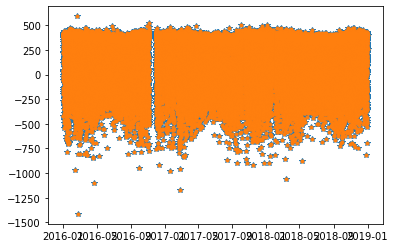

In [29]:
plt.plot(lfframe.en_imb1,'*')
plt.plot(lfframe.en_imb1,'.')

## adelaide River:

In [30]:
AR = '../Data/tern/AdelaideRiver/' 

ARncfile = xr.open_mfdataset(AR +'/*.nc')  #,combine='nested')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


### Vdict ar

In [31]:
arframe= ARncfile.to_dataframe()
arframe.index=arframe.index.set_names(['Time'])#'latitute', 'longitute'
arframe.reset_index(inplace=True)
arframe['timestamp']= pd.to_datetime(arframe[['Year' ,'Month','Day','Hour','Minute','Second']])
arframe.index=arframe.timestamp
arframe=arframe[(arframe.Ws_CSAT_QCFlag==00)&(arframe.Fld_QCFlag==00)&(arframe.Flu_QCFlag==00)&(arframe.Fh_QCFlag==00)&(arframe.Ta_QCFlag==00)]
arframe=arframe.replace(-9999.000000, np.nan)
arframe["T_a"] = pd.Series(arframe.Ta + 273.15, index=arframe.index)
arframe["Ws"] = arframe.Ws_CSAT



In [32]:
#arframe

##  Titree

In [33]:
Titree = '../Data/tern/Ti_tree/' 
TTncfile = xr.open_mfdataset(Titree +'/*.nc') #, concat_dim= 'ensemble')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will 

In [34]:
titreeframe= TTncfile.to_dataframe()
titreeframe.index=titreeframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
titreeframe.reset_index(inplace=True)
titreeframe.index=titreeframe.time 
titreeframe=titreeframe[(titreeframe.Ws_QCFlag==00)&(titreeframe.Fld_QCFlag==00)&(titreeframe.Flu_QCFlag==00)&(titreeframe.Fh_QCFlag==00)&(titreeframe.Ta_QCFlag==00)]#&(titreeframe.Fn_QCFlag==00)&(titreeframe.Ws_QCFlag==00)]
titreeframe=titreeframe.replace(-9999.000000, np.nan)
titreeframe["T_a"] = pd.Series(titreeframe.Ta + 273.15, index=titreeframe.index)
titreeframe["en_imb"] = titreeframe.Flu-(titreeframe.Fh+titreeframe.Fe+titreeframe.Fg)


## Dalyuncleared

In [35]:
dalyunc = '../Data/tern/dalyuncleared/'
dalyuncncfile = xr.open_mfdataset(dalyunc +'/*.nc',compat='override',coords='all')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future defa

In [36]:
dalyuncframe= dalyuncncfile.to_dataframe()
dalyuncframe.index=dalyuncframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
dalyuncframe.reset_index(inplace=True)
dalyuncframe.index=dalyuncframe.time 
dalyuncframe=dalyuncframe[(dalyuncframe.Ws_QCFlag==00)&(dalyuncframe.Fld_QCFlag==00)&(dalyuncframe.Flu_QCFlag==00)&(dalyuncframe.Fh_QCFlag==00)&(dalyuncframe.Ta_QCFlag==00)]#&(dalyuncframe.Fn_QCFlag==00)&(dalyuncframe.Ws_CSAT_QCFlag==00)]
dalyuncframe=dalyuncframe.replace(-9999.000000, np.nan)
dalyuncframe["T_a"] = dalyuncframe.Ta + 273.15


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

## variable def:

In [37]:
class epsilon (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon'
    #default = 0.9

        
class sigma (Variable):
    """ stefan-boltzmann constant""" 
    unit =  watt/(meter**2 * kelvin**4)
    latex_name ='\sigma'
    default = 5.6704 * 10**-8


class T_s(Variable): 
    """Effective surface temperature.""" 
    unit = kelvin 
    latex_name ='T_{s}'
       
    
class T_a(Variable): 
    """Air temperature""" 
    unit = kelvin 
    latex_name ='T_a'   
 
    
class R_lout(Variable): 
    """upwelling longwave""" 
    unit = watt/meter**2
    latex_name ='R_{l,out}'
    #default = Hs.longwave_up
    
    
class H(Variable): 
    """sensible heat""" 
    unit = watt/meter**2
    latex_name ='H'
    
class delta_T(Variable): 
    """difference in surface and air temperature""" 
    unit = kelvin 
    latex_name ='\Delta T'

    

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "essm.variables.physics.thermodynamics:T_a" will be overridden by "__main__:<class '__main__.T_a'>"
  instance[expr] = instance


In [38]:
# calculation of Ts considering both eitted and reflected radiation(Mike)
class R_lin(Variable):
    """Incoming Longwave radiation"""
    latex_name = r'R_{l,in}'
    unit = watt/meter**2
class eq_Rlout_Rlin(Equation):
    """Upwelling longwave radiation including reflected."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4 + (1-epsilon) * R_lin)
eq_Rlout_Rlin

In [39]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout_Rlin

### SEQ

In [40]:
class eq_Rlout(Equation):
    """Upwelling longwave radiation."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4)
eq_Rlout


In [41]:
class eq_Ts_Rlout(eq_Rlout.definition):
    """Surface temperature as a function of LWout"""
    soln = solve(eq_Rlout, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout

# Plot-scale epsilon using LEQ:

### function

In [42]:

def opteps_RLM (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2","c"])
    k=0
    epsilon1=np.arange(0.4,1,0.002).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years) & (df_all.index.month == mnth)& 
                (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
        tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_rlm.loc[k]=[RMSE, m, epsilon1[j], r2,c]
        else:
            opteps_rlm.loc[k]=[np.nan, np.nan, 1, r2,np.nan]
        k=k+1
        
        
        
    df_eps_ref=opteps_rlm.copy()## copying data frame for sorting based on minimum rmse
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0],df_eps_ref.c.iloc[0])
        
            

In [43]:
opteps_RLM (2016, spframe,6)

In [44]:
def opteps_monthly (site,years, df_all,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    
   
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth) 
                & (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn<25) | (df_all.Ws < 2))]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
    tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        
        
    list_T_s = tf_T_s(df.Fld,df.Flu)
    list_T_s2 = tf_T_s2(df12.Fld,df12.Flu)
    df = df.assign(T_s=list_T_s)
    list_H = df.Fh
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    df12 = df12.assign(T_s2=list_T_s2)
    list_DT2 = df12.T_s2 - df12.T_a
    df12 = df12.assign(DT2=(df12.T_s2 - df12.T_a))#
   
   
        ####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    #####
    reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x + c
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=mx+c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}'.format(str(np.round(m,decimals=eqdigits)),
                                                                  str(np.round(c,decimals=eqdigits)),       
                                                                  str(np.round(r2,decimals=eqdigits)),
                                                                  str(np.round(RMSE, decimals=eqdigits)),
                                                                  str(np.round(N, decimals=eqdigits)))

        
        
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(7.5, 5)
    plt.scatter(x=x, y=y, marker="+",s = 50, c=df['en_imb'], cmap="spring") #,vmin=min(c),vmax=max(c)
    cbar1=plt.colorbar(label="Energy imbl $(W m^{-2})$",orientation="vertical")#.set_label(label="Energy imbl $(W m^{-2})$",size=20)
    cbar1.ax.tick_params(labelsize=16) 
    cbar1.ax.yaxis.label.set_size(fontsize=20)    
    #plt.plot(x,y,"+",label='_nolegend_')
    #plt.plot(df12.DT2,df12.Fh,".k",label='_nolegend_')
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0}, {1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    plt.xticks(fontsize=20) #[-6,-3,0,3,6,9,12]
    plt.yticks(fontsize=20)
    #plt.xlim(-8, 13)
    #plt.ylim(-100, 500)
    plt.legend(loc="best",fontsize=12)
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

33.76348920562578


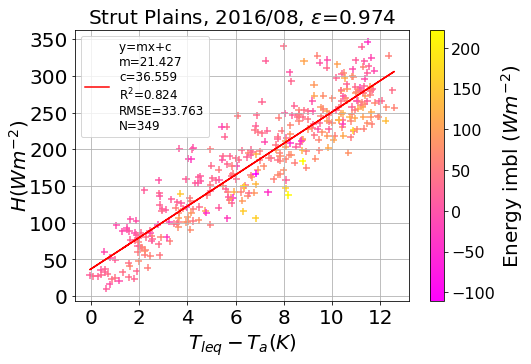

33.76348920562578


In [45]:
opteps_monthly ("Strut Plains",2016, spframe,8,0.974)

In [46]:
opt_eps=opteps_RLM (2016,hsframe, 8)[0]


56.94314846154965


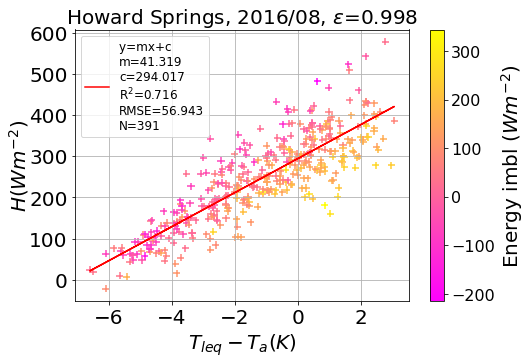

56.94314846154965


In [47]:
opteps_monthly ("Howard Springs",2016, hsframe,8,opt_eps)

25.05158666728739


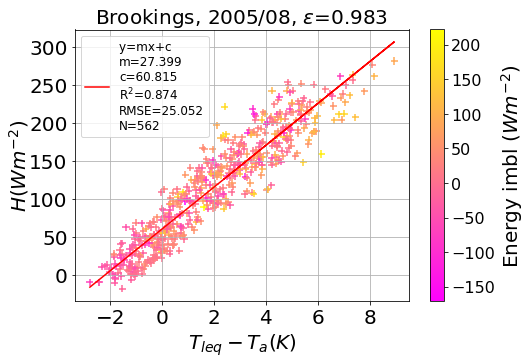

25.05158666728739


In [48]:
opteps_monthly ("Brookings",2005, brookframe,8,0.983)

48.7050208845


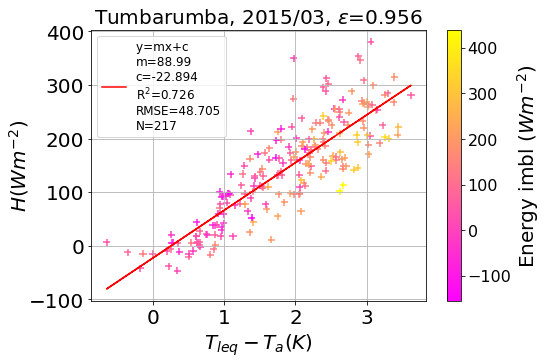

48.7050208845


In [49]:
opteps_monthly ("Tumbarumba",2015, tumframe,3,0.956)

42.8785993250852


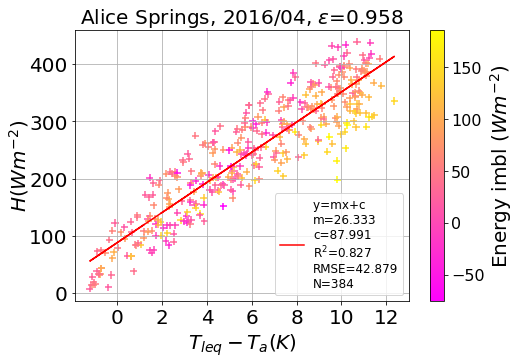

42.8785993250852


In [50]:
opteps_monthly ("Alice Springs",2016, asframe,4,0.958)

## Sturt Plains 

26.965445688610536


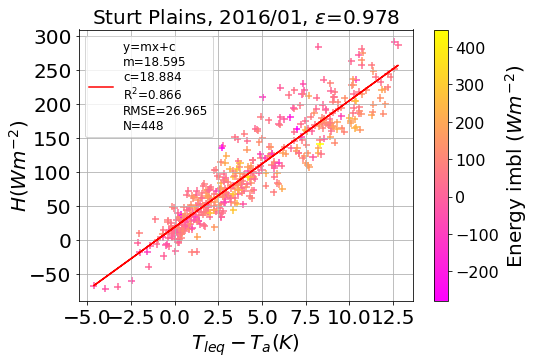

26.965445688610536
18.946186641954945


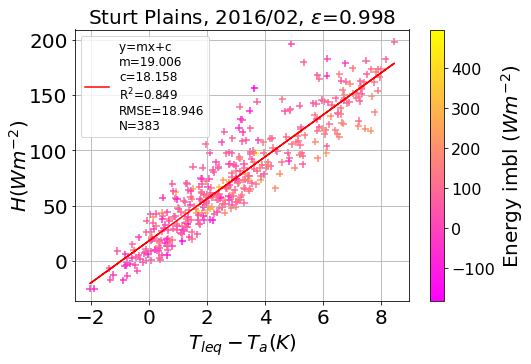

18.946186641954945
25.5731506237812


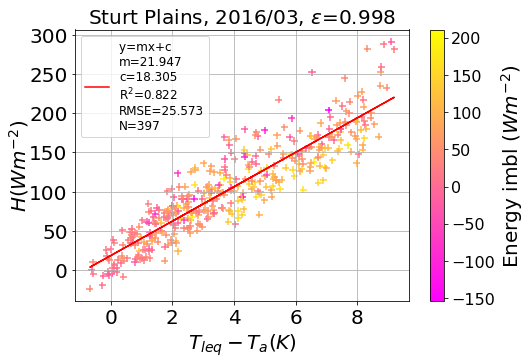

25.5731506237812
33.76948082947165


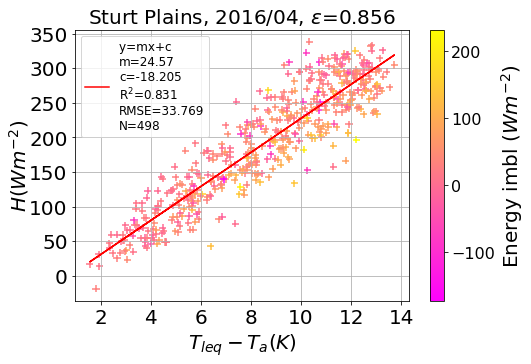

33.76948082947165
30.064272950757445


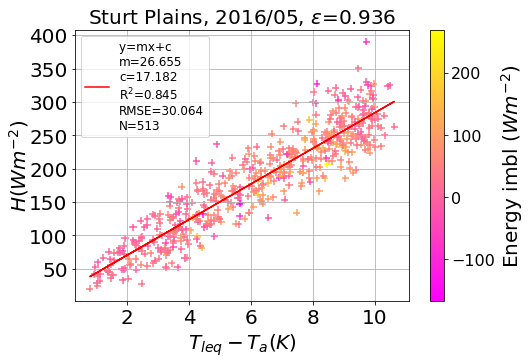

30.064272950757445
30.326744396867866


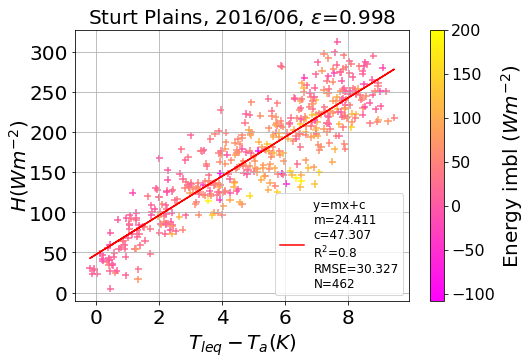

30.326744396867866
28.878275034521977


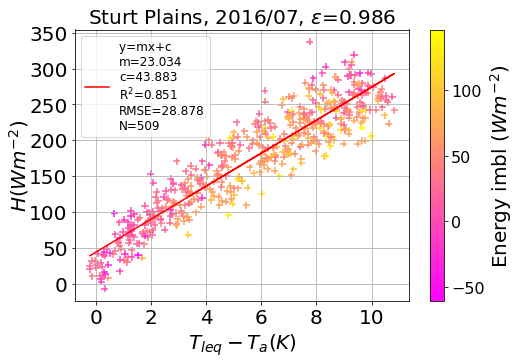

28.878275034521977
31.535700662470372


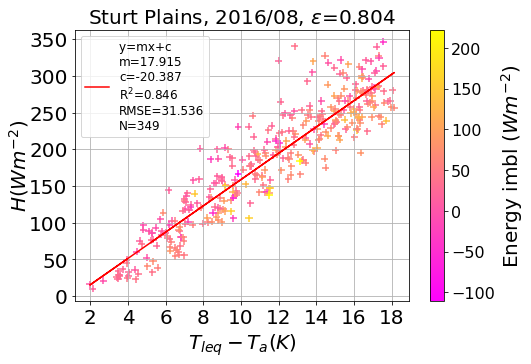

31.535700662470372
34.145519449203995


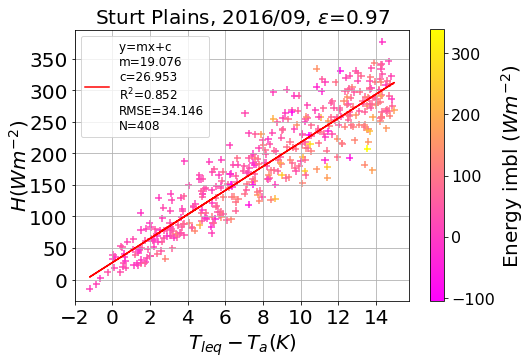

34.145519449203995
43.87877833064191


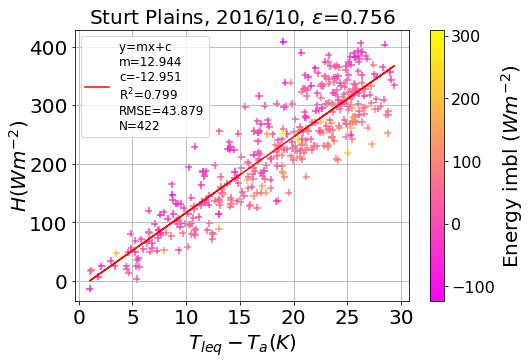

43.87877833064191
33.576362065004936


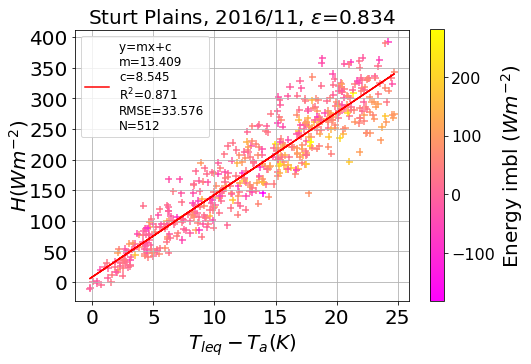

33.576362065004936
39.00366950515324


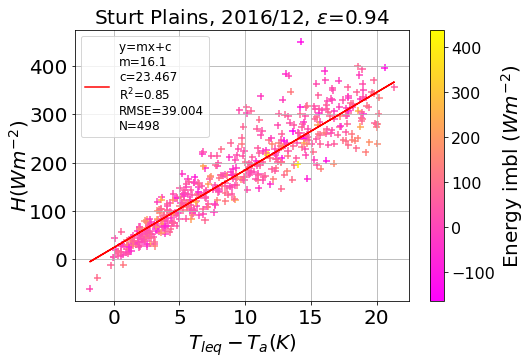

39.00366950515324
13.781139782361983


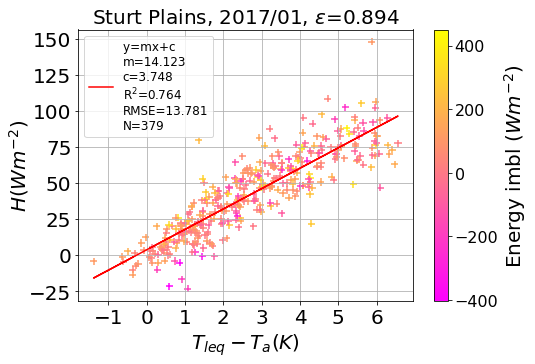

13.781139782361983
18.56243779989436


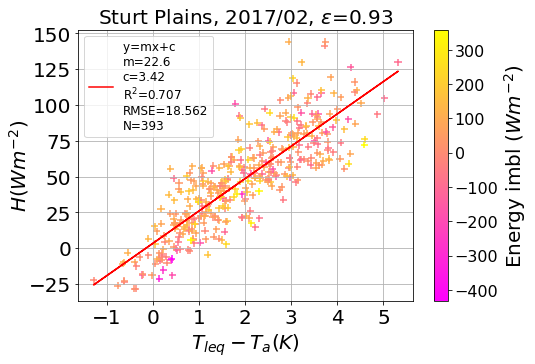

18.56243779989436
21.60473015370987


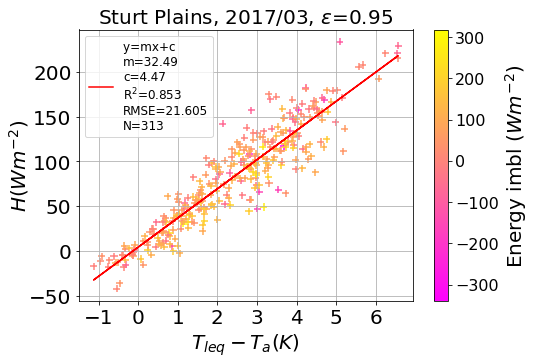

21.60473015370987
30.117256970704435


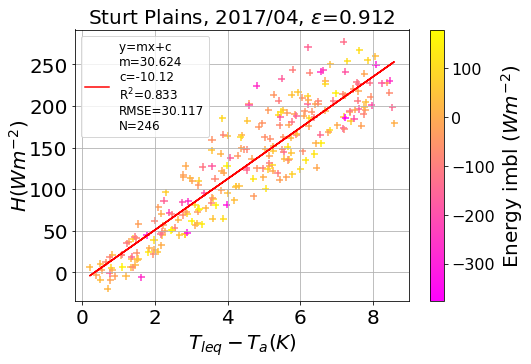

30.117256970704435
32.21556349200392


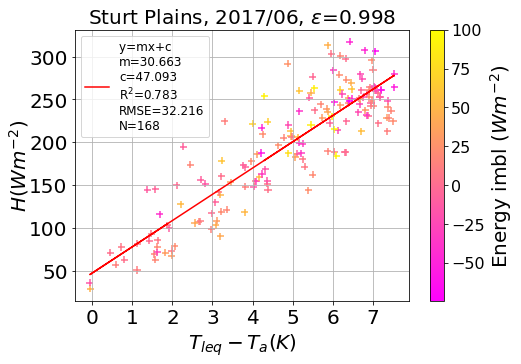

32.21556349200392
29.020894709400395


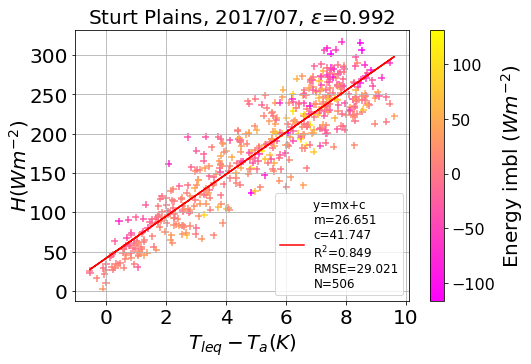

29.020894709400395
33.49379310321929


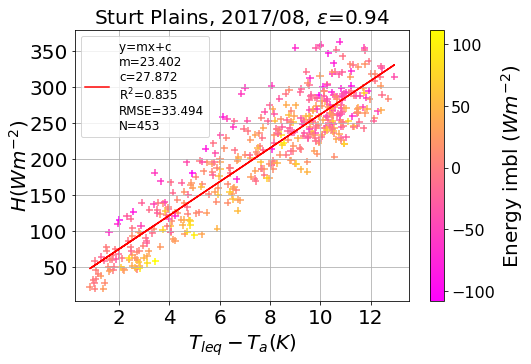

33.49379310321929
32.452972473424744


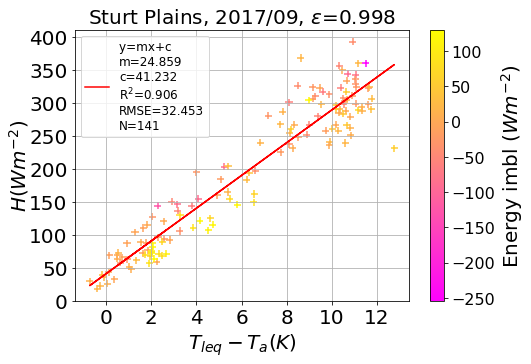

32.452972473424744
35.64299290619037


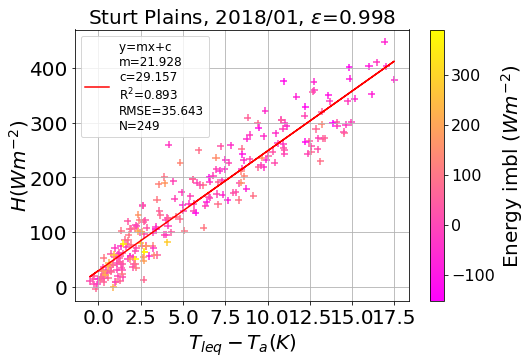

35.64299290619037
27.40279583013206


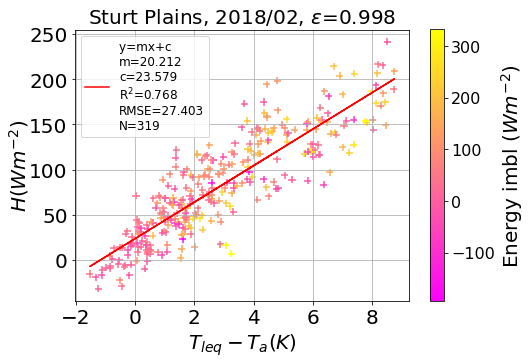

27.40279583013206
34.09946770286731


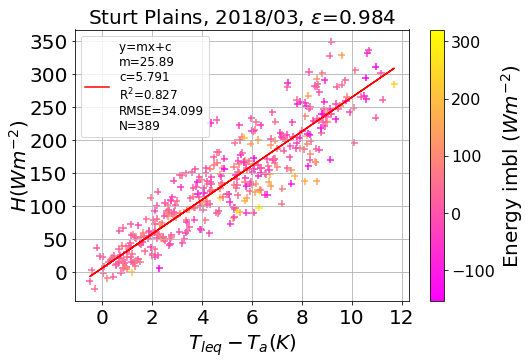

34.09946770286731
32.066923187141164


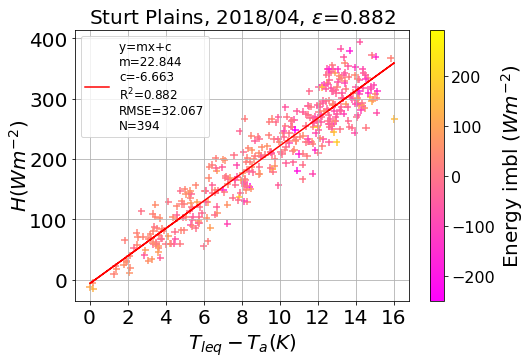

32.066923187141164
32.37639547466021


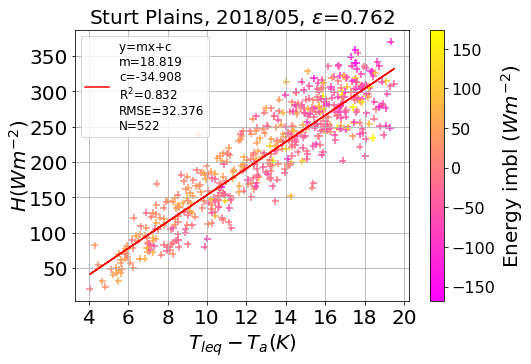

32.37639547466021
30.31616484921118


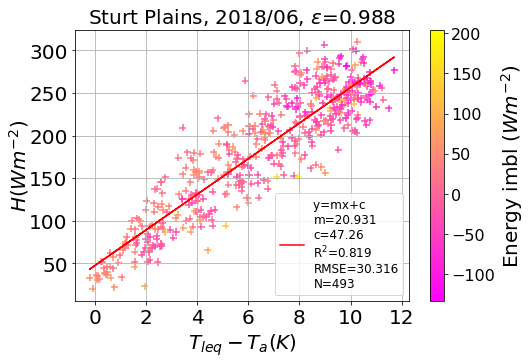

30.31616484921118
35.32978769387924


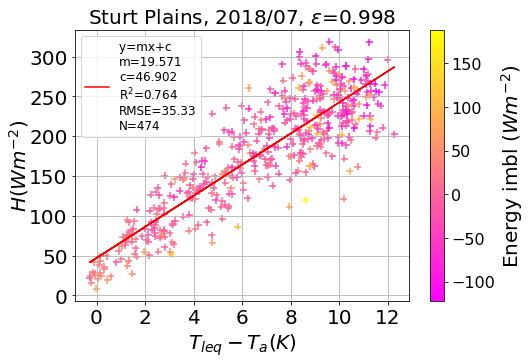

35.32978769387924
38.95532063922527


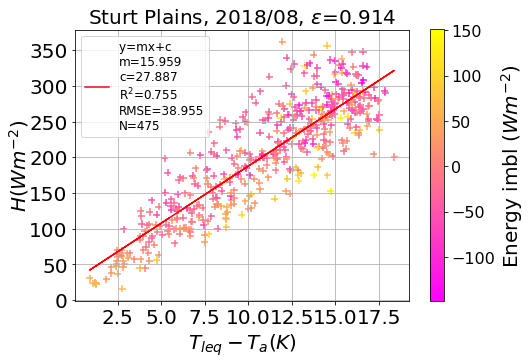

38.95532063922527
41.019398236559304


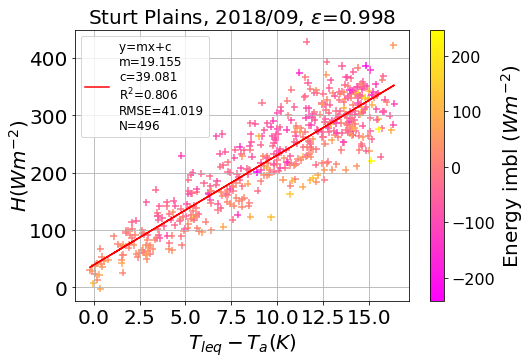

41.019398236559304
41.38275913140736


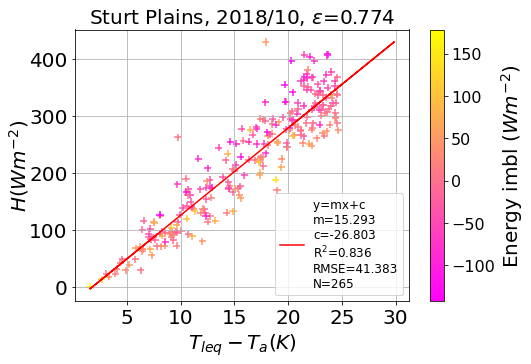

41.38275913140736
32.080047056137865


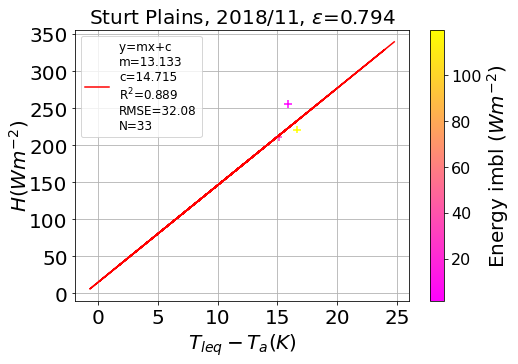

32.080047056137865
41.21957692133641


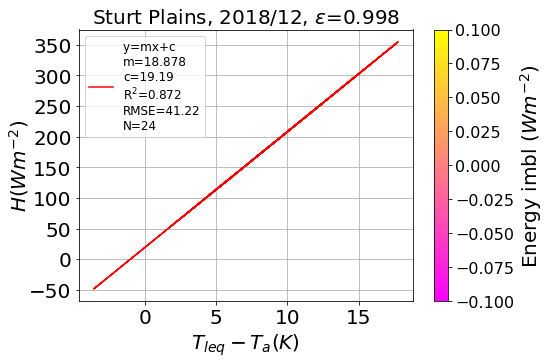

41.21957692133641


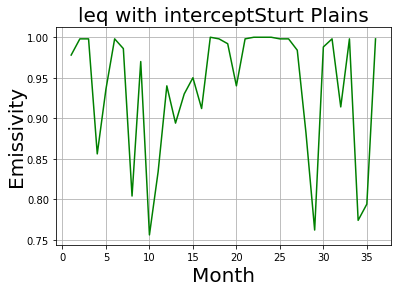

In [51]:
site="Sturt Plains"
df=spframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_sp=[]
list_slope_sp=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_sp.append(opt_eps)
            list_slope_sp.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_sp.append(1)
            list_slope_sp.append(np.nan)

plt.plot(np.arange(len(list_opteps_sp))+1,list_opteps_sp,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq with intercept{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Alice spring

55.25014802933347


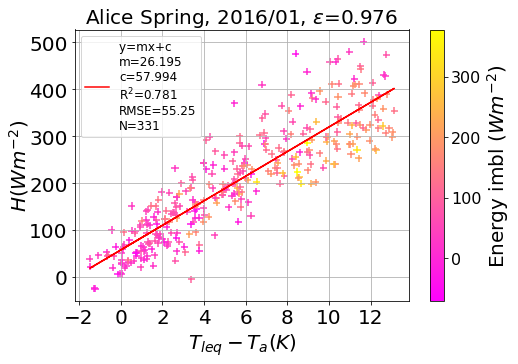

55.25014802933347
49.78314994534381


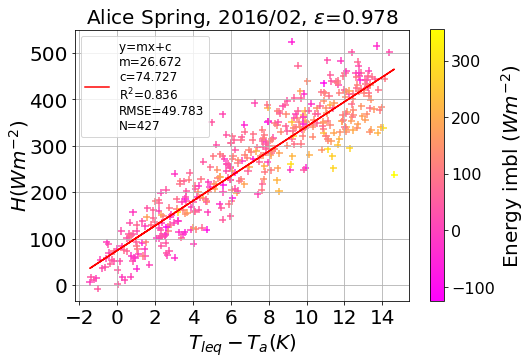

49.78314994534381
48.441264007588


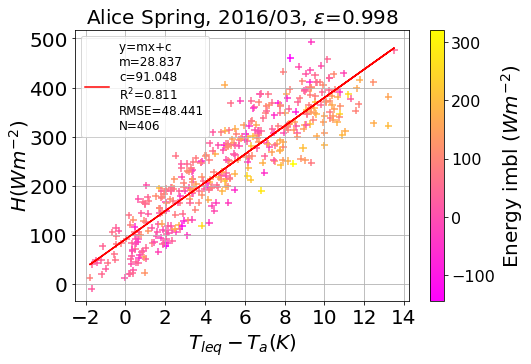

48.441264007588
42.87859932508511


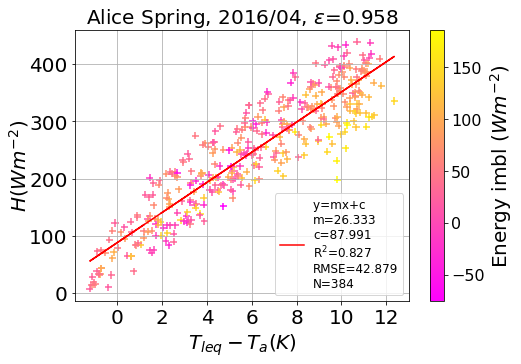

42.87859932508511
40.41295943032325


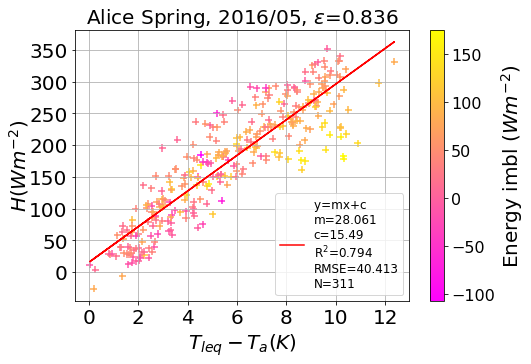

40.41295943032325
36.250650680959396


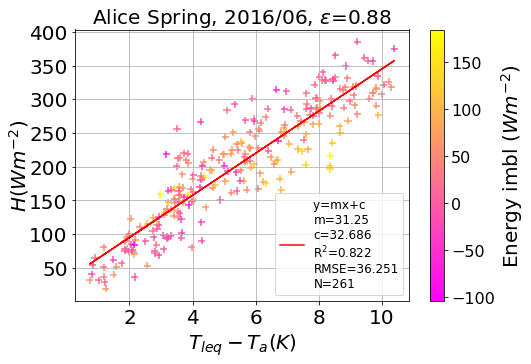

36.250650680959396
38.16160423175558


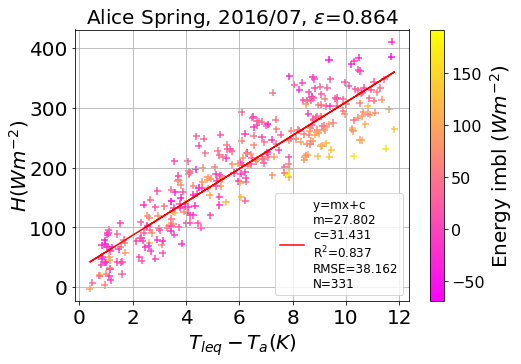

38.16160423175558
45.43659070584856


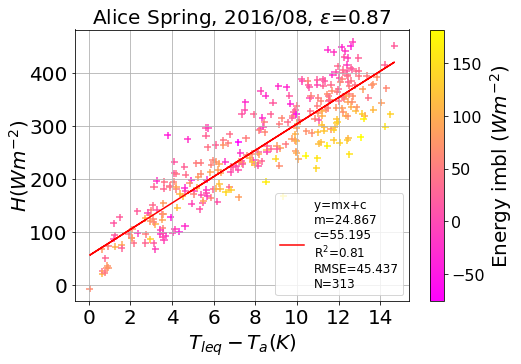

45.43659070584856
43.78592303741593


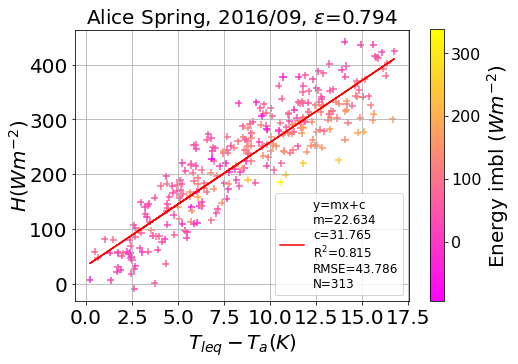

43.78592303741593
54.57281207585849


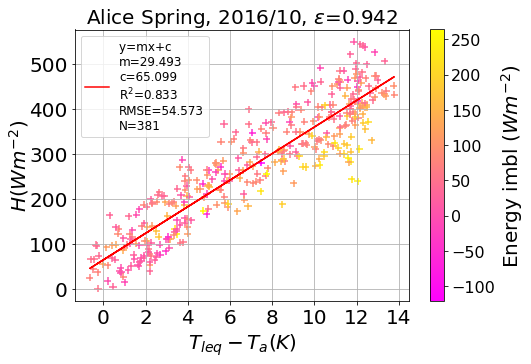

54.57281207585849
52.88856104305557


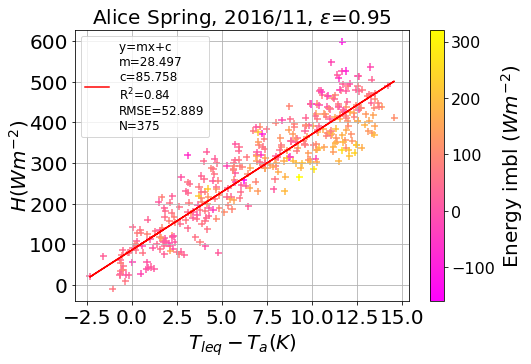

52.88856104305557
56.166126740232556


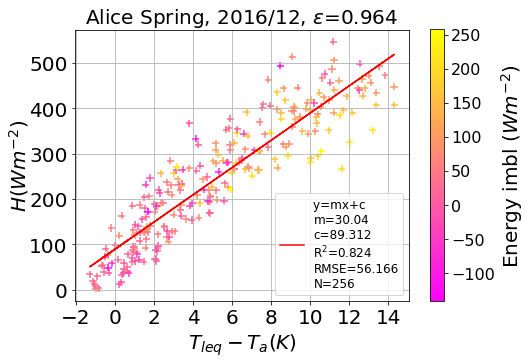

56.166126740232556
50.77702088431564


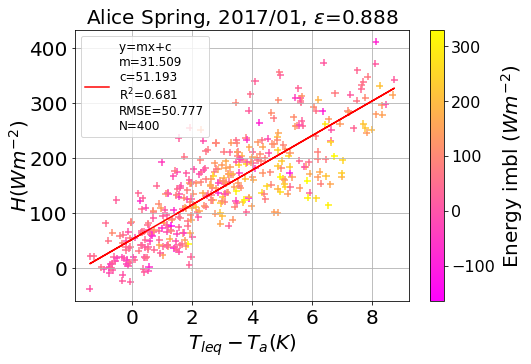

50.77702088431564
42.97694729283424


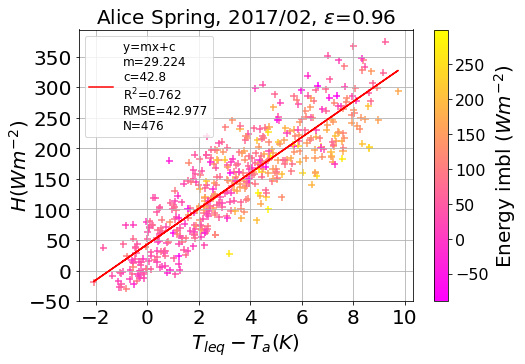

42.97694729283424
42.934439854709176


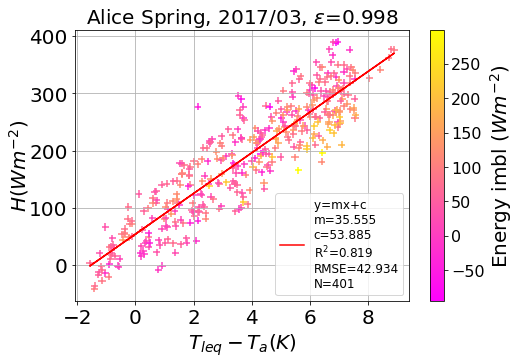

42.934439854709176
48.56527257262133


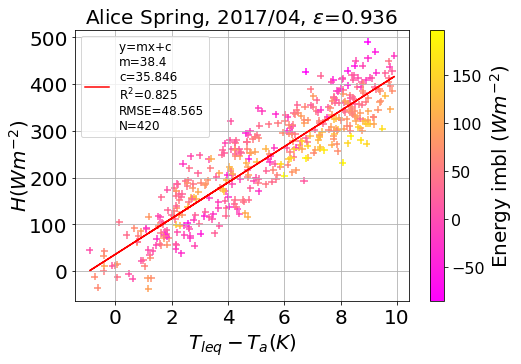

48.56527257262133
46.342105941568974


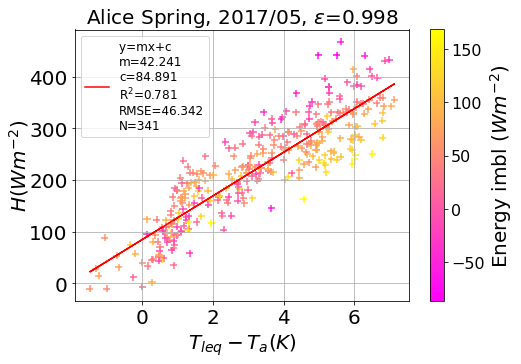

46.342105941568974
41.32254852841597


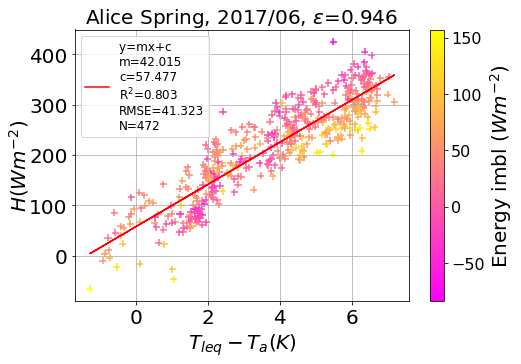

41.32254852841597
38.51077200671424


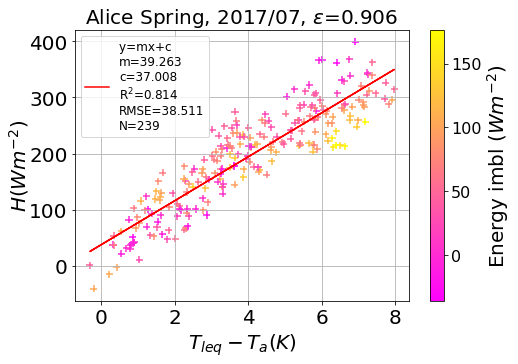

38.51077200671424
38.629617653843574


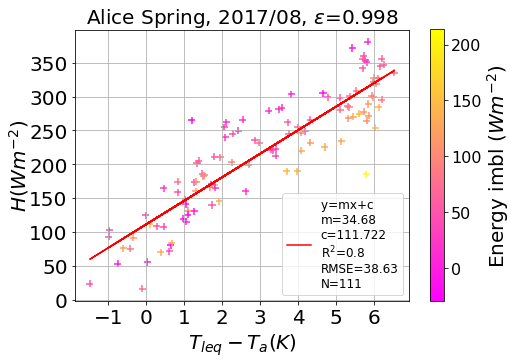

38.629617653843574
52.253532181277706


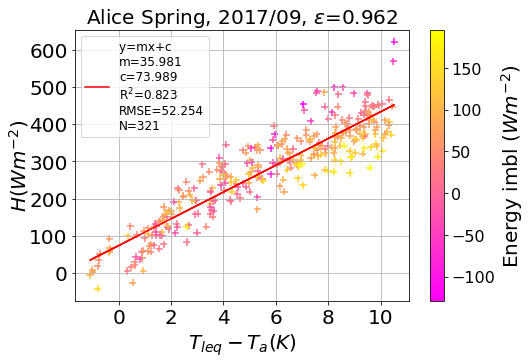

52.253532181277706
61.11191242128495


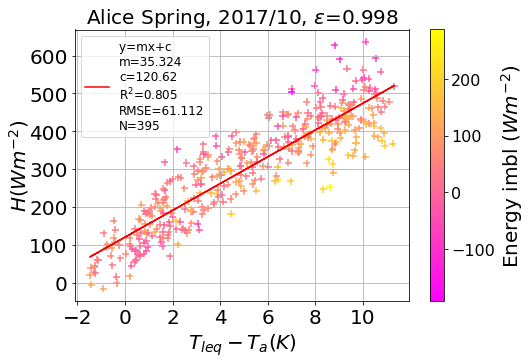

61.11191242128495
56.266440268843816


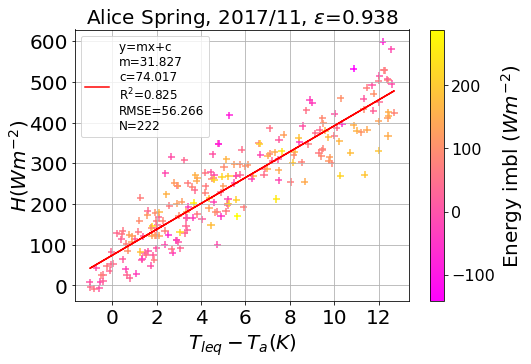

56.266440268843816
54.44576743560827


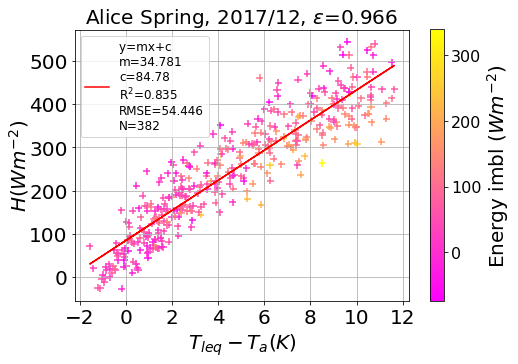

54.44576743560827
56.87038614770083


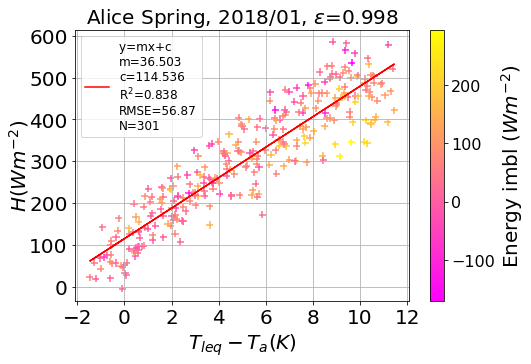

56.87038614770083
61.536572996349186


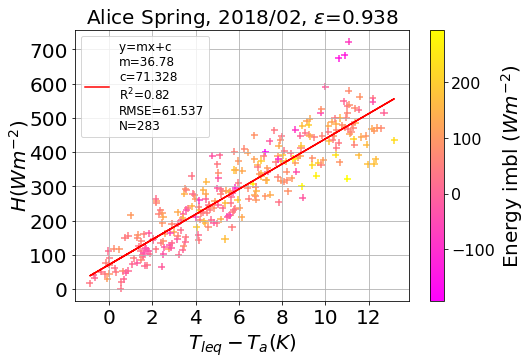

61.536572996349186
55.353814126753214


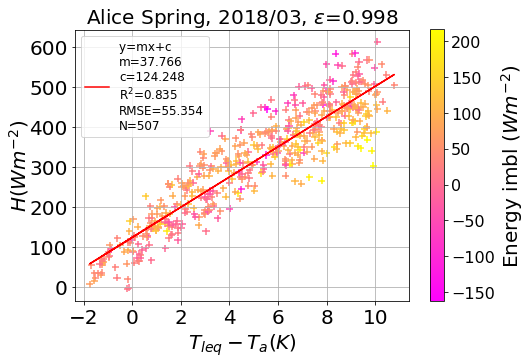

55.353814126753214
53.08937659855751


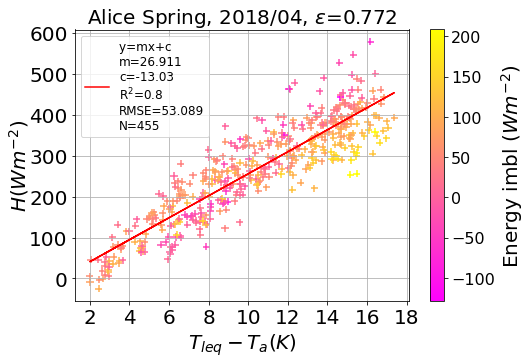

53.08937659855751
48.42983511652585


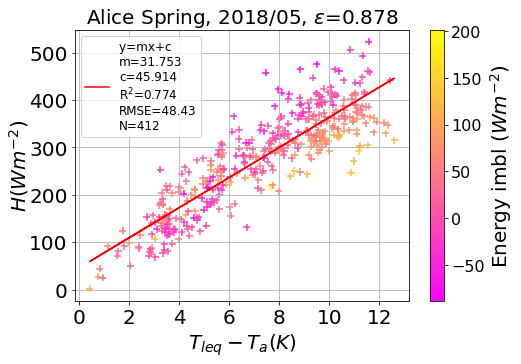

48.42983511652585
41.98395575724164


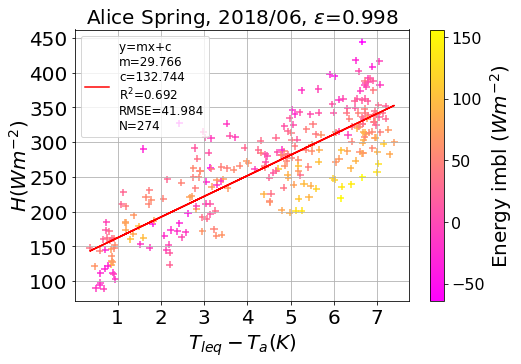

41.98395575724164
43.042633120056834


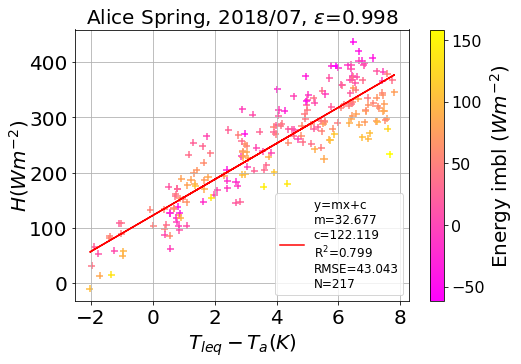

43.042633120056834
53.46311905375455


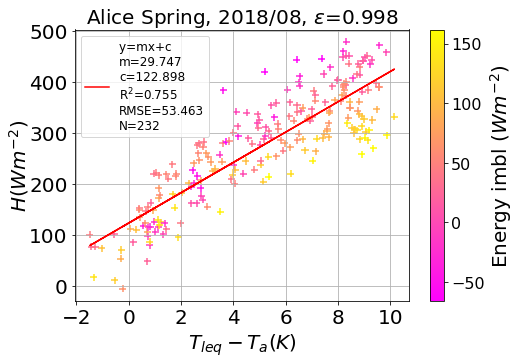

53.46311905375455
59.390951644422216


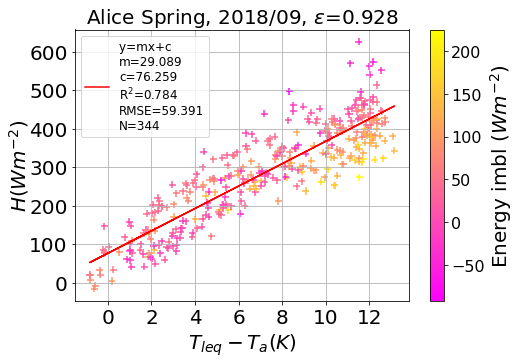

59.390951644422216
56.39133230579728


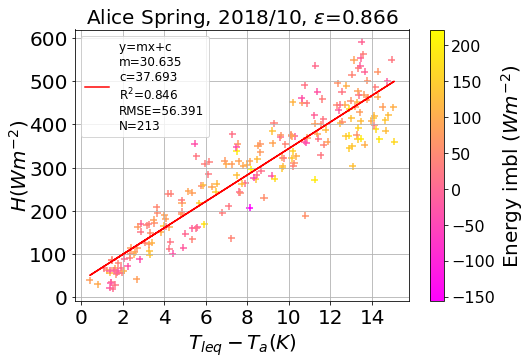

56.39133230579728
54.74453033555062


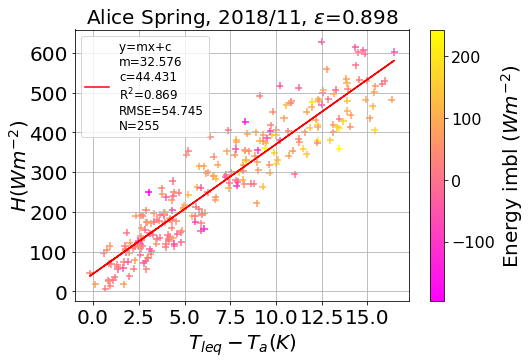

54.74453033555062
59.78146246751017


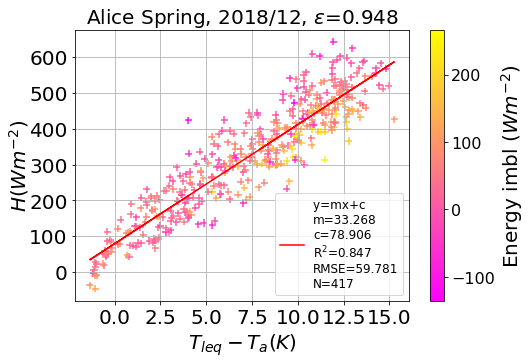

59.78146246751017


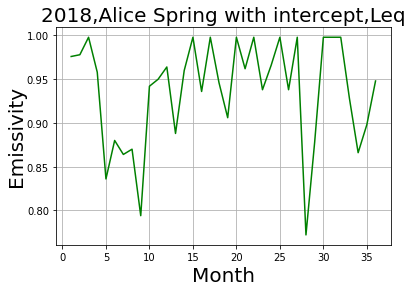

In [52]:
site="Alice Spring"
df=asframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_as=[]
list_slope_as=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_as.append(opt_eps)
            list_slope_as.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_as.append(np.nan)
            list_slope_as.append(np.nan)

eps_as=np.array(list_opteps_as)## converting into array
eps_as=eps_as[~np.isnan(eps_as)]## removing nan
plt.plot(np.arange(len(eps_as))+1,eps_as[~np.isnan(eps_as)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = '{0},Alice Spring with intercept,Leq'.format(str(np.round(yr)))
fname = 'intercept{0}'.format(str(np.round(yr)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

### Howard Spring:

46.02406015339869


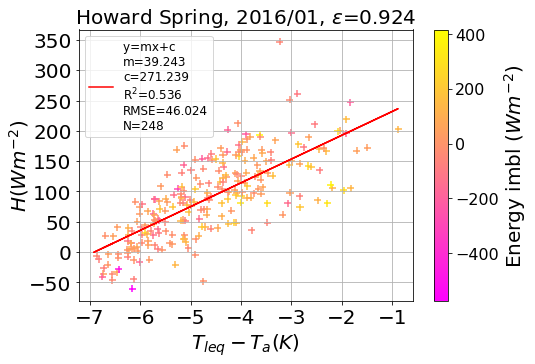

46.02406015339869
44.901624675434746


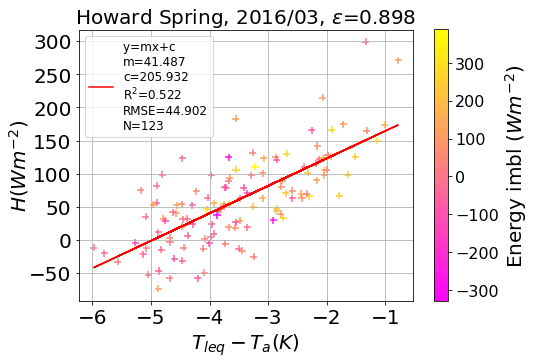

44.901624675434746
49.27331047921725


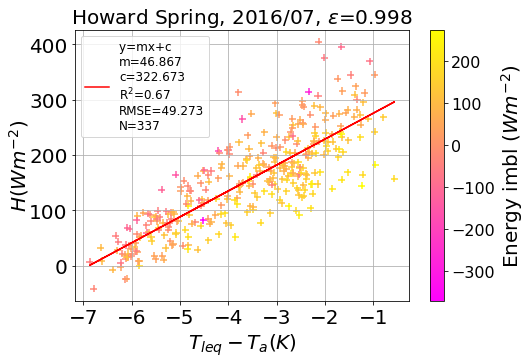

49.27331047921725
56.94314846154965


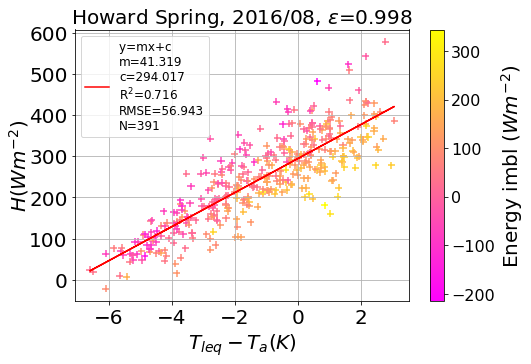

56.94314846154965
58.96527361257346


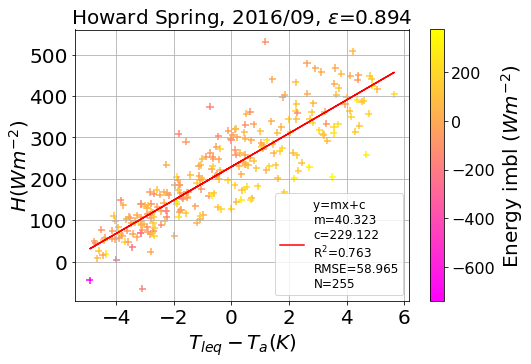

58.96527361257346
49.64267973175669


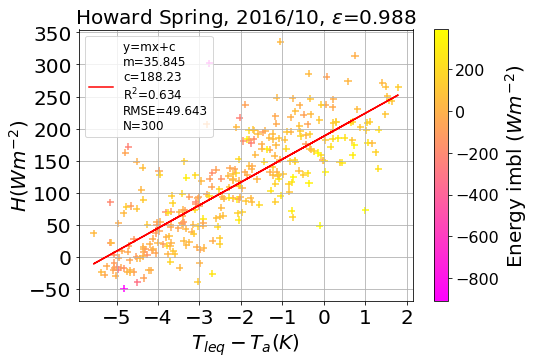

49.64267973175669
62.27048403019907


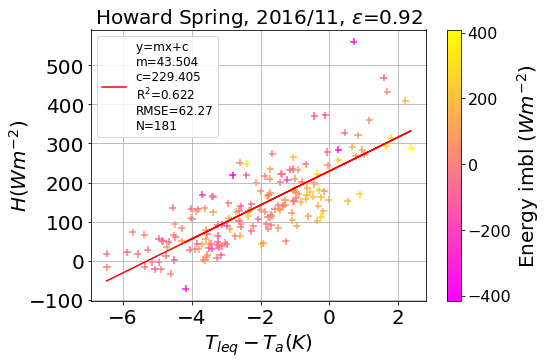

62.27048403019907
41.36793370966737


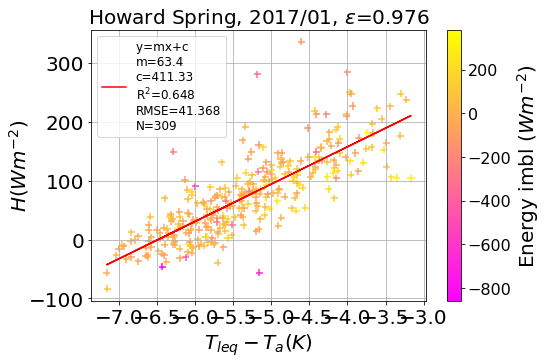

41.36793370966737
48.04380602441986


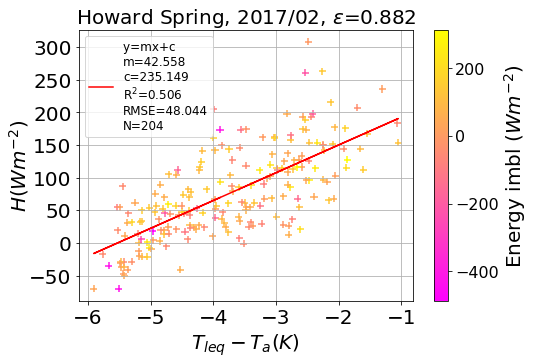

48.04380602441986
49.008941518539984


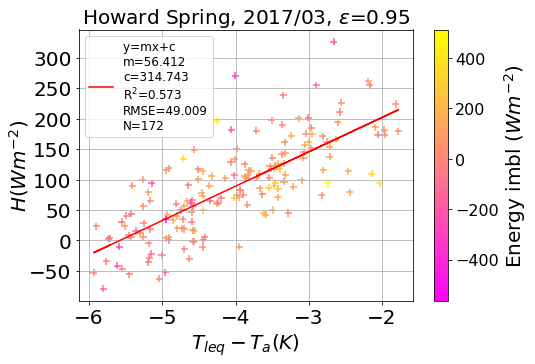

49.008941518539984
44.74878252888047


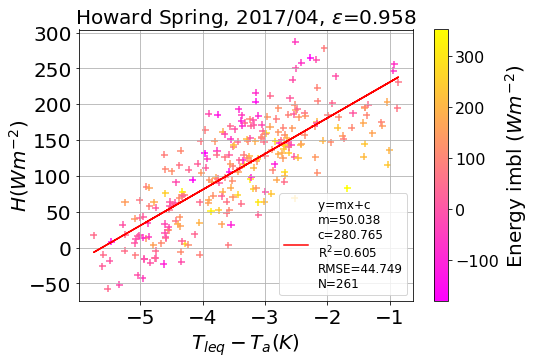

44.74878252888047
47.629964076251056


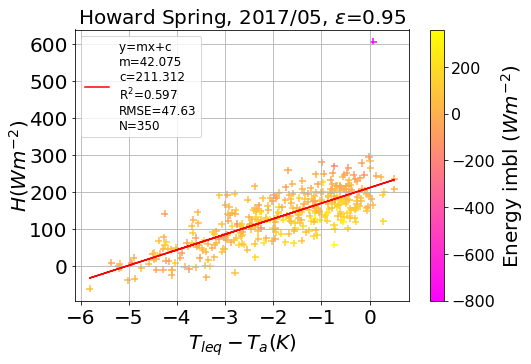

47.629964076251056
46.16838204484929


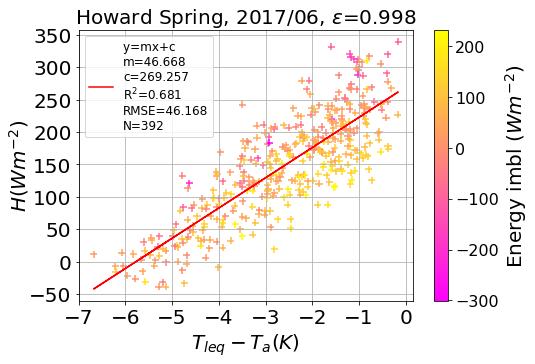

46.16838204484929
50.03357155757113


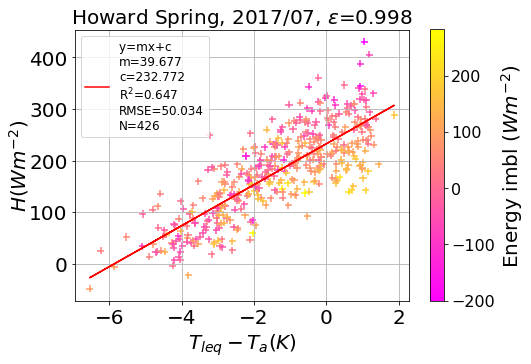

50.03357155757113
57.85549979921597


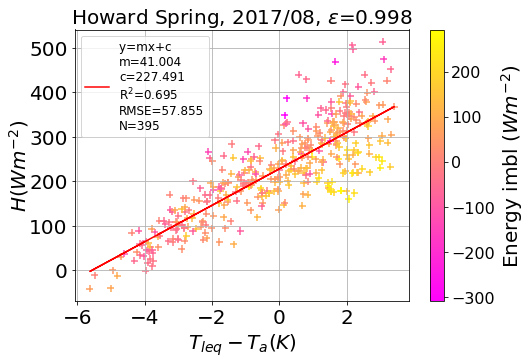

57.85549979921597
62.01416973491258


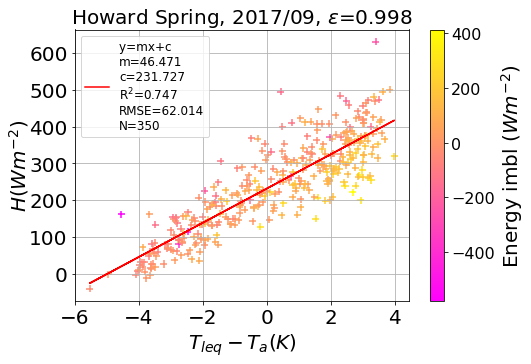

62.01416973491258
55.465387757367154


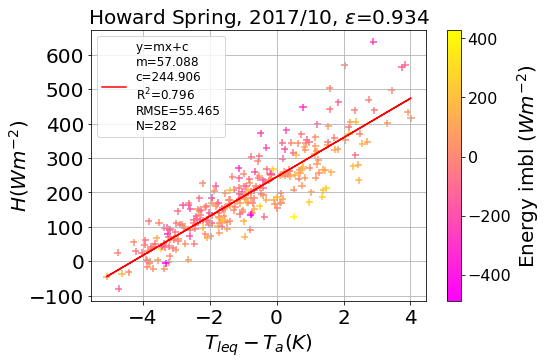

55.465387757367154
56.94072534469147


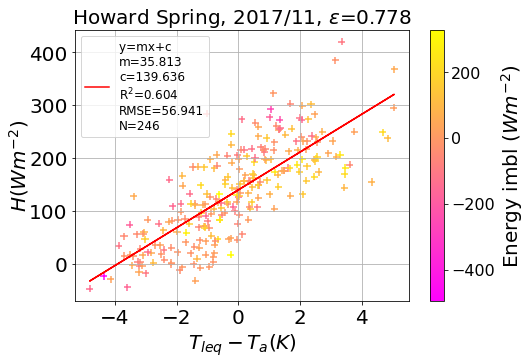

56.94072534469147
43.629188328071606


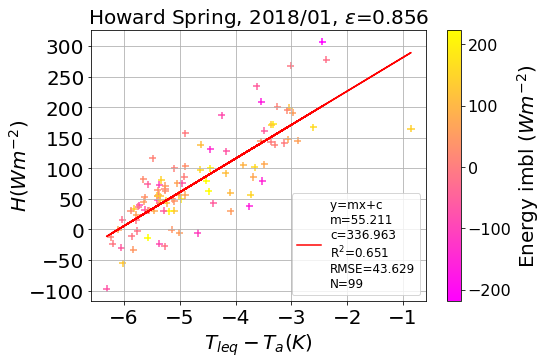

43.629188328071606
45.205348085807124


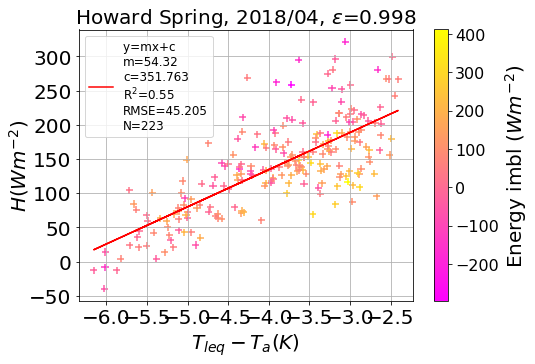

45.205348085807124
57.1459021387664


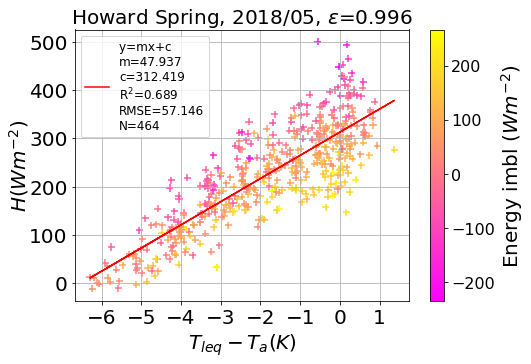

57.1459021387664
53.83373050292321


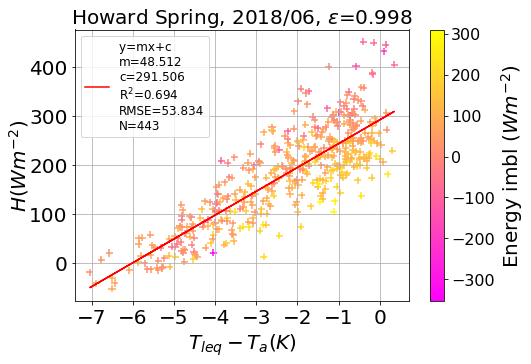

53.83373050292321
52.79826819539957


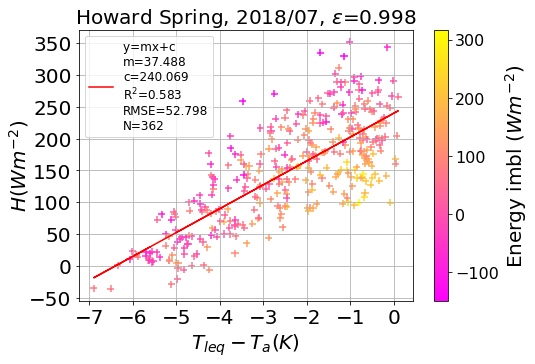

52.79826819539957
53.37732607021419


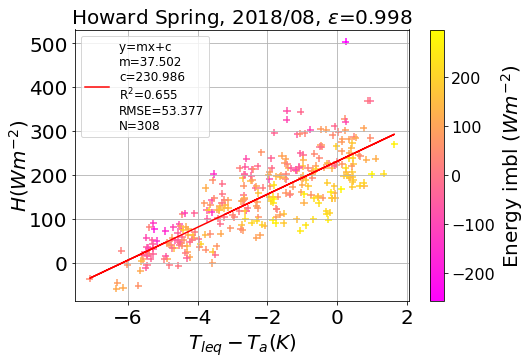

53.37732607021419
59.86239031308848


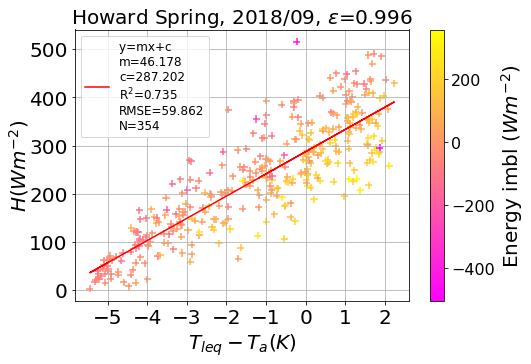

59.86239031308848
61.127555305623524


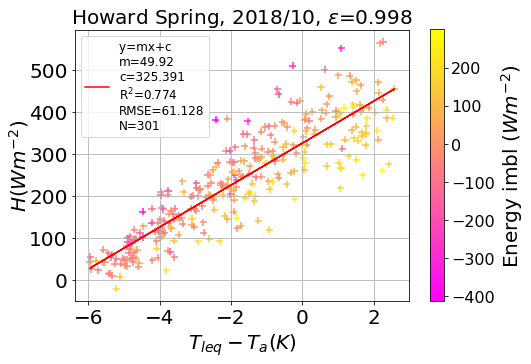

61.127555305623524
59.32559095484266


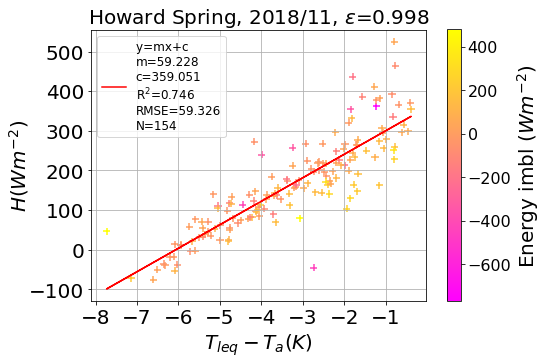

59.32559095484266
44.11380115262544


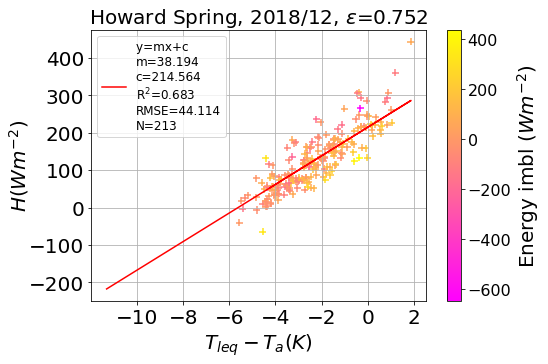

44.11380115262544


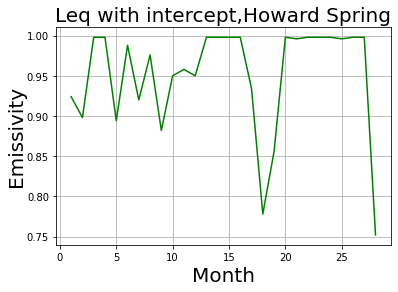

In [53]:
site="Howard Spring"
df=hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_hs=[]
list_slope_hs=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_hs.append(opt_eps)
            list_slope_hs.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_hs.append(np.nan)
            list_slope_hs.append(np.nan)

eps_hs=np.array(list_opteps_hs)## converting into array
eps_hs=eps_hs[~np.isnan(eps_hs)]## removing nan
plt.plot(np.arange(len(eps_hs))+1,eps_hs[~np.isnan(eps_hs)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'Leq with intercept,{0}'.format(str(site))
#fname = 'as_Leq_intercept{0}'.format(str(np.round(yr)))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Tumbarumba:

57.27328570544102


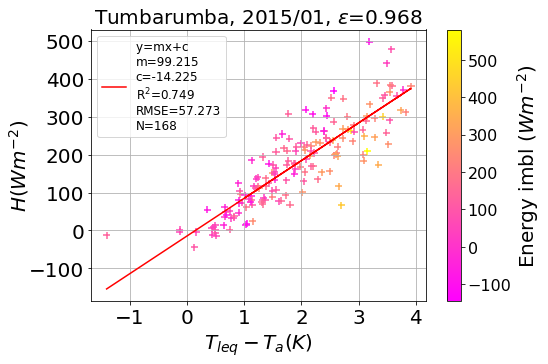

57.27328570544102
56.933294875766286


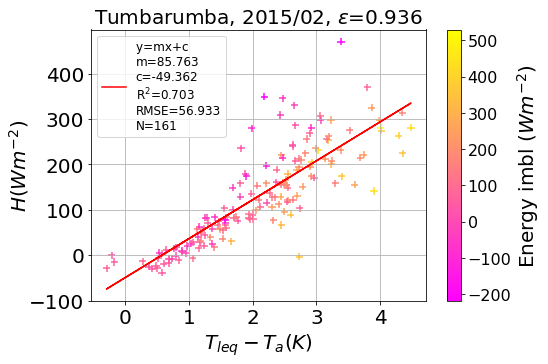

56.933294875766286
48.705020884499866


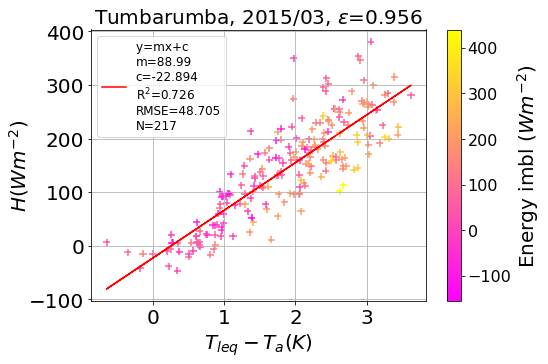

48.705020884499866
60.25118653160712


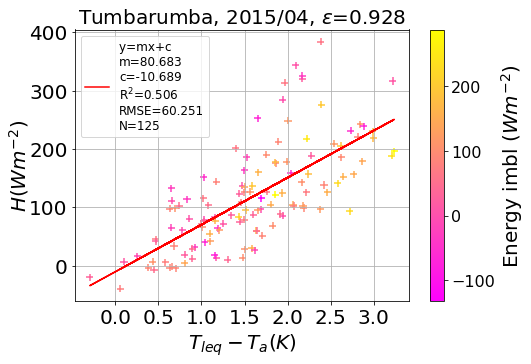

60.25118653160712
39.94030780236583


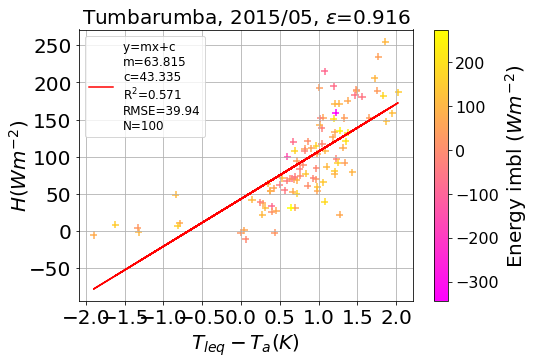

39.94030780236583
53.92741709488326


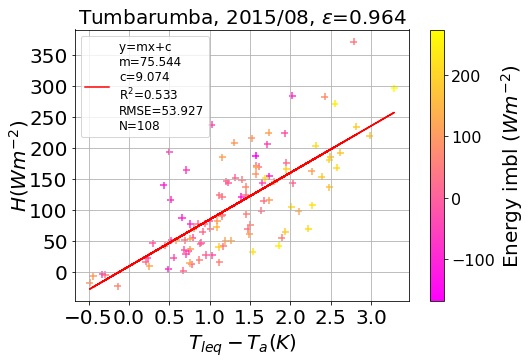

53.92741709488326
48.73420921272427


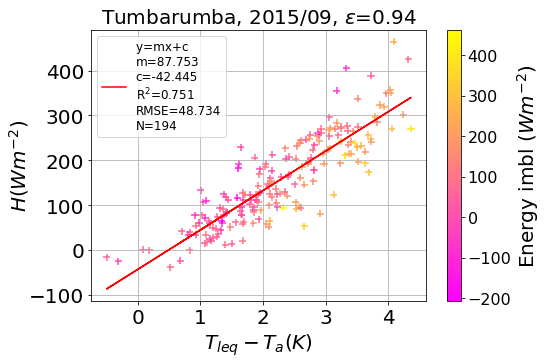

48.73420921272427
52.72140389410221


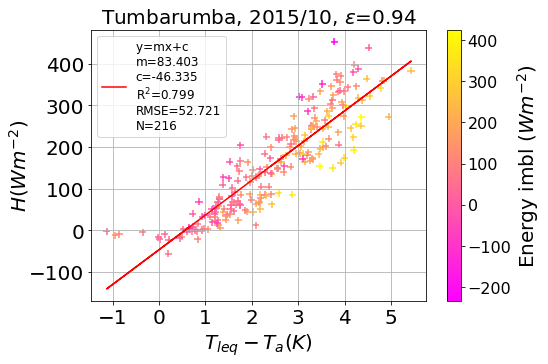

52.72140389410221
59.67473112153728


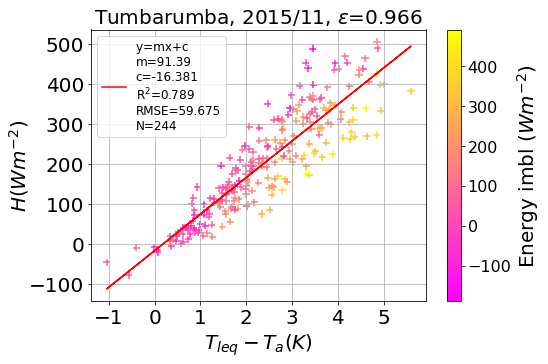

59.67473112153728
56.91383982882901


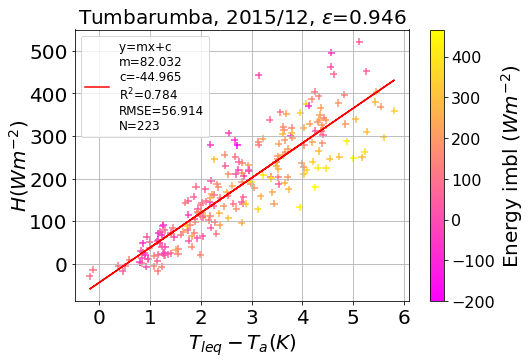

56.91383982882901
55.6545072356989


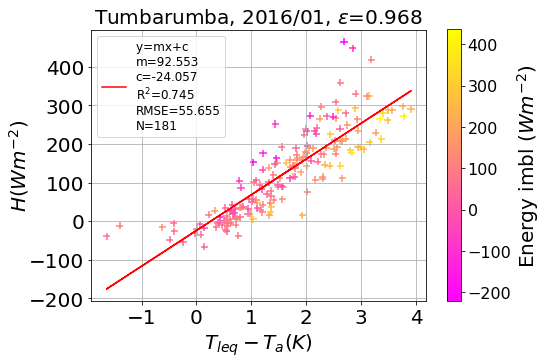

55.6545072356989
46.61663347699397


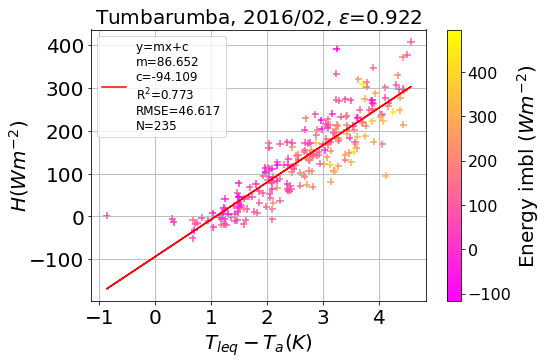

46.61663347699397
40.462785896718096


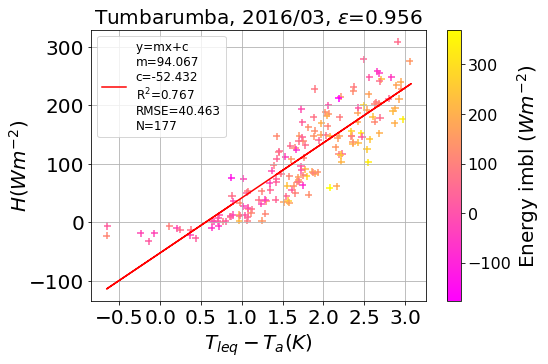

40.462785896718096
41.06294443220658


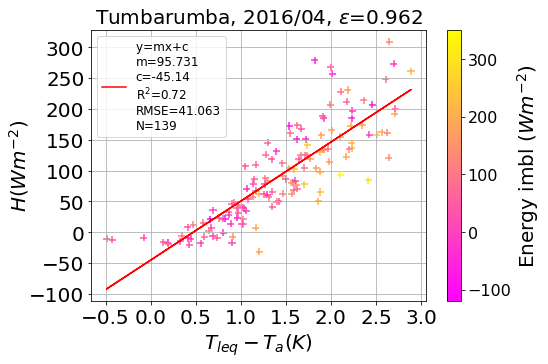

41.06294443220658
47.29760361938632


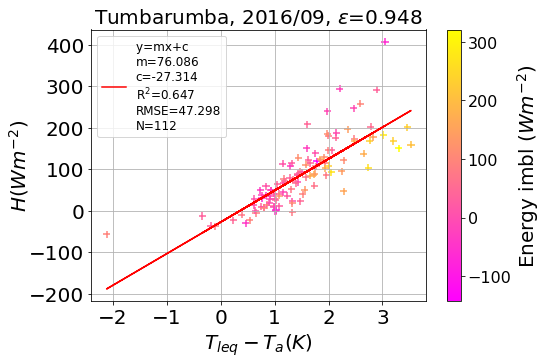

47.29760361938632
60.05140729355229


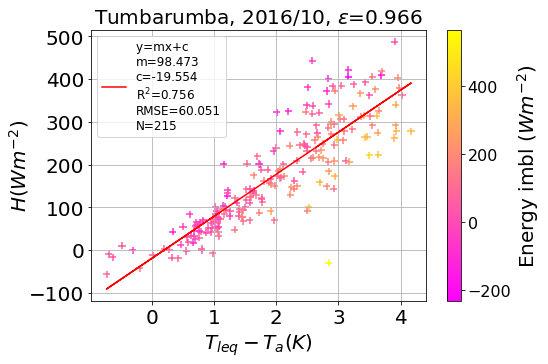

60.05140729355229
64.68457098020535


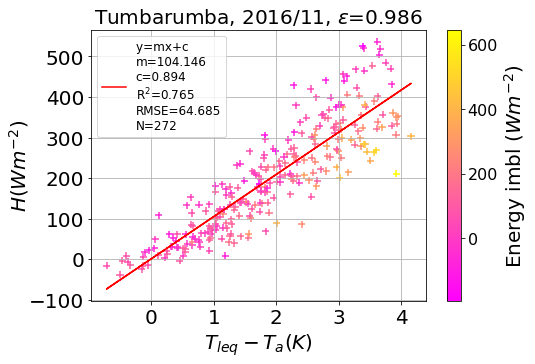

64.68457098020535
55.1703788926085


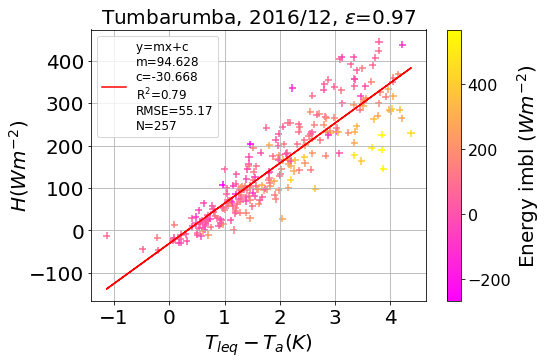

55.1703788926085
56.54218222704173


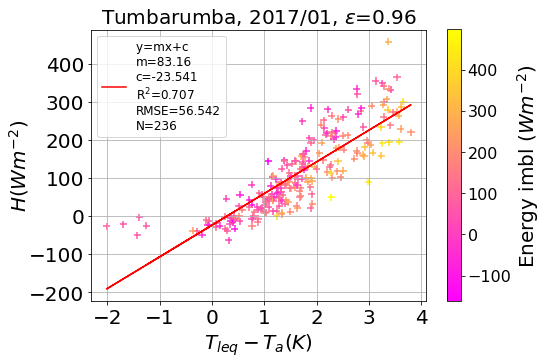

56.54218222704173
60.94279545441235


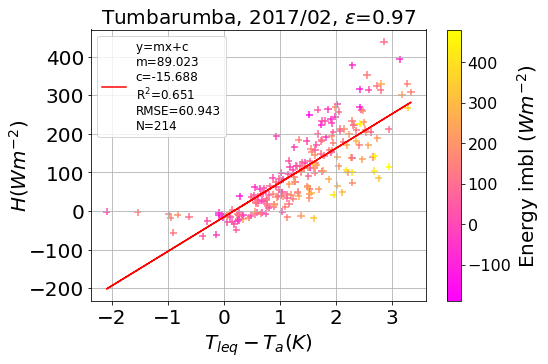

60.94279545441235
51.706800361975375


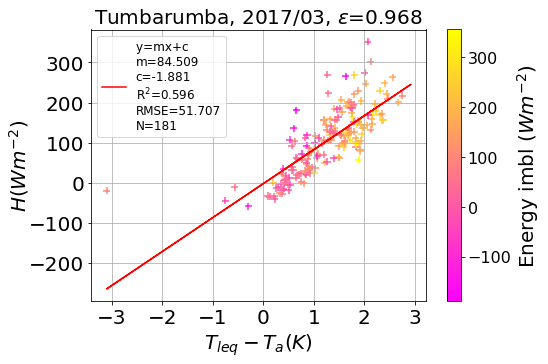

51.706800361975375
46.332959117808144


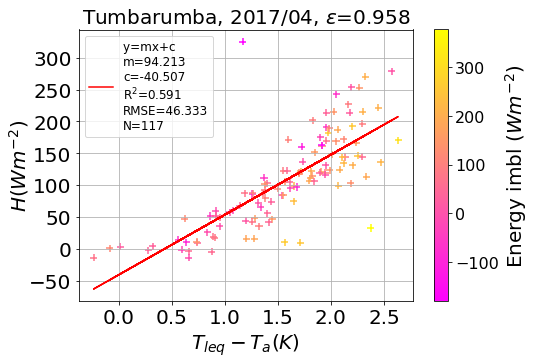

46.332959117808144
32.924469591555045


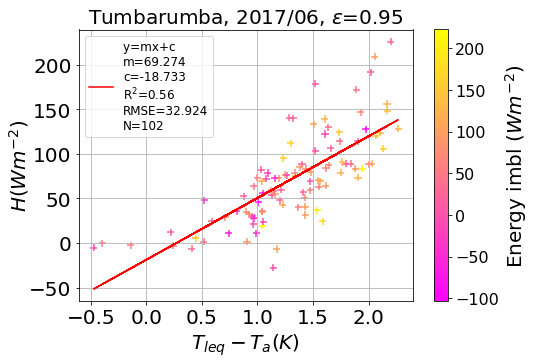

32.924469591555045
33.92740619102141


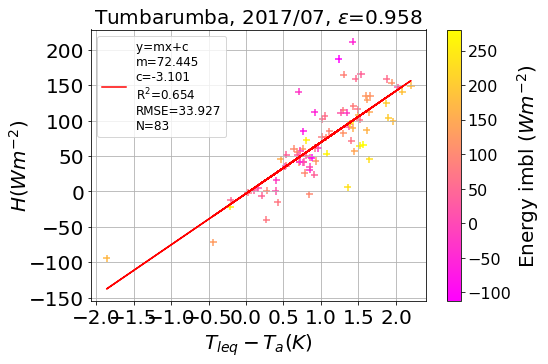

33.92740619102141
61.360092690136256


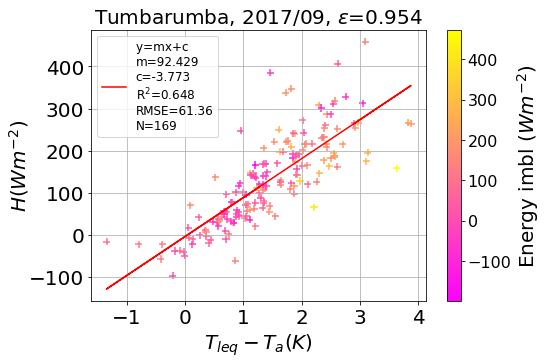

61.360092690136256
52.5896342598603


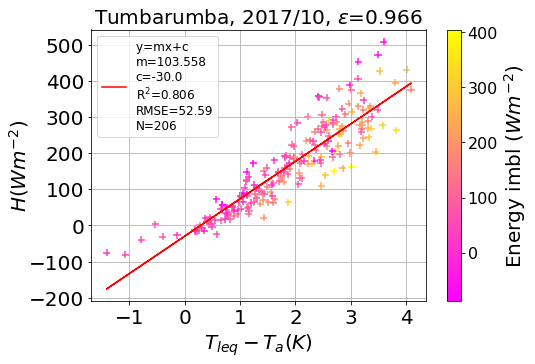

52.5896342598603
53.99613606515302


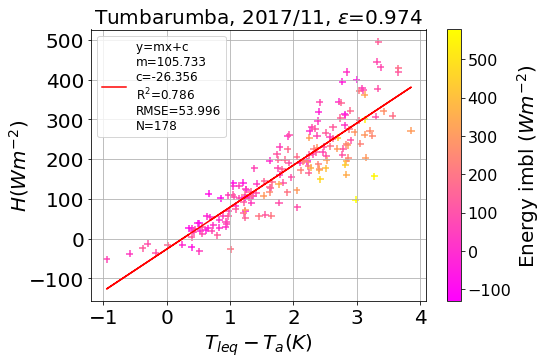

53.99613606515302
56.62454780295935


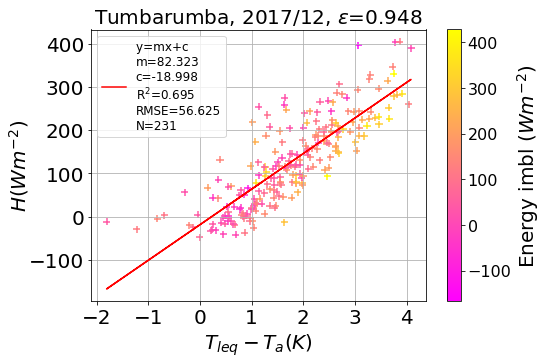

56.62454780295935


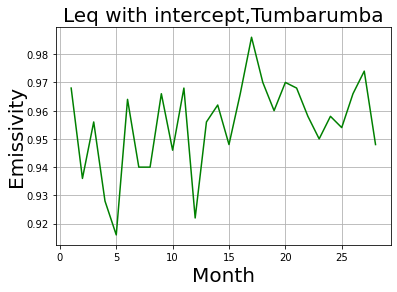

In [54]:
site="Tumbarumba"
df=tumframe.copy()
mnth=0                             
eqdigits=3
list_opteps_tum=[]
list_slope_tum=[]
list_intrc_tum=[]
for yr in range(2015,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        intrc=loop_result[2]
        if opt_eps < 1:
            list_opteps_tum.append(opt_eps)
            list_slope_tum.append(slope)
            list_intrc_tum.append(intrc)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_tum.append(np.nan)
            list_slope_tum.append(np.nan)
            list_intrc_tum.append(np.nan)
eps_tum=np.array(list_opteps_tum)## converting into array
eps_tum=eps_tum[~np.isnan(eps_tum)]## removing nan
plt.plot(np.arange(len(eps_tum))+1,eps_tum[~np.isnan(eps_tum)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle,fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Maximum H and intercept

In [55]:
df_as = df.resample('MS').median()

In [56]:
#maximum H from each month
df=tumframe[(tumframe.Fn > 25)&(tumframe.Ws > 2)]
H_max=df.Fh.resample('M').max() # max sensible heat from each month
m = np.asarray(H_max)
print(len(m))
#print(len(opt_month_data1))

36


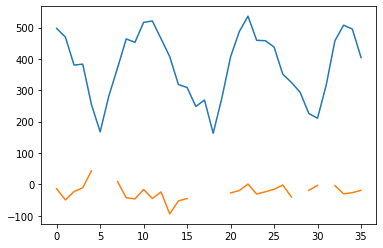

In [57]:
plt.plot(m)
plt.plot(list_intrc_tum)

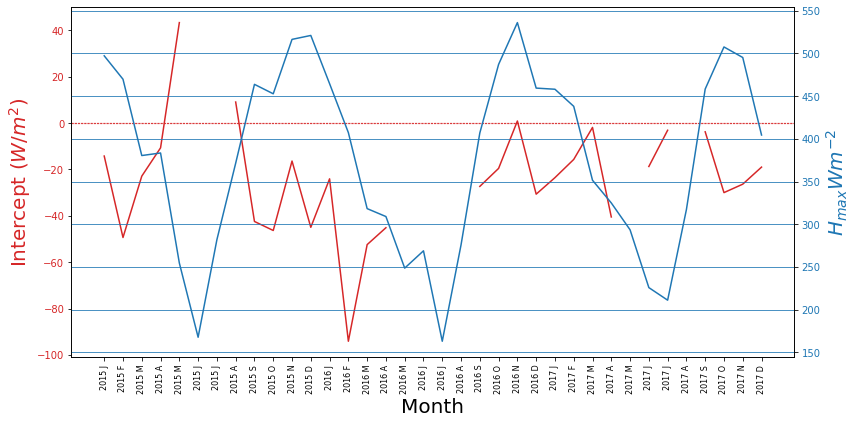

In [58]:
site="Tumbarumba"
#df=opt_month_data.copy()
mnths=np.arange(1,37,1)

fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:red'
ax1.set_xlabel('Month', fontsize=20)
ax1.set_ylabel('Intercept $(W/m^{2})$', color=color, fontsize=20)

ax1.plot(mnths,list_intrc_tum, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.axhspan(0,0.001,color=color,alpha=0.9, lw=1.2,ls='dotted')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.xticks(np.arange(1,37,1))
xtickNames = plt.setp(ax1, xticklabels=('2015 J','2015 F', '2015 M','2015 A','2015 M','2015 J','2015 J','2015 A',
                                     '2015 S','2015 O','2015 N','2015 D','2016 J','2016 F', '2016 M','2016 A','2016 M','2016 J','2016 J','2016 A',
                                     '2016 S','2016 O','2016 N','2016 D','2017 J', '2017 F', '2017 M', '2017 A', 
                                     '2017 M', '2017 J','2017 J','2017 A','2017 S', '2017 O','2017 N', '2017 D'))
                                      
plt.setp(xtickNames, rotation=90, fontsize=8)

color = 'tab:blue'
ax2.set_ylabel('$H_{max} Wm^{-2}$', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(mnths,m, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.rc('axes')
#plt.xticks(np.arange(1,37,1))
ax2.grid(color=color)

plottitle = site  + ' LEQ (y=mx+c)'
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fname = 'slopes_AS'
#plt.title(plottitle)
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Litchfield:

36.609891752281214


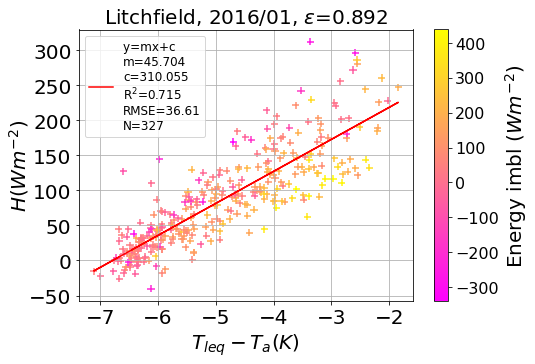

36.609891752281214
42.407591028828314


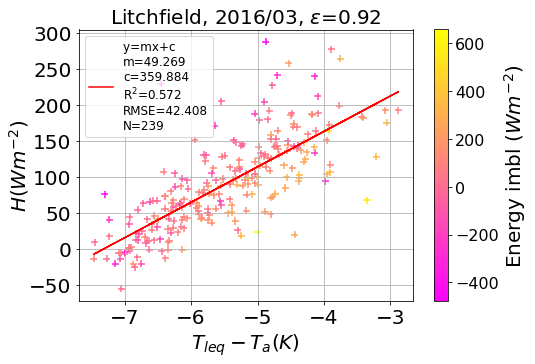

42.407591028828314
38.97129516440621


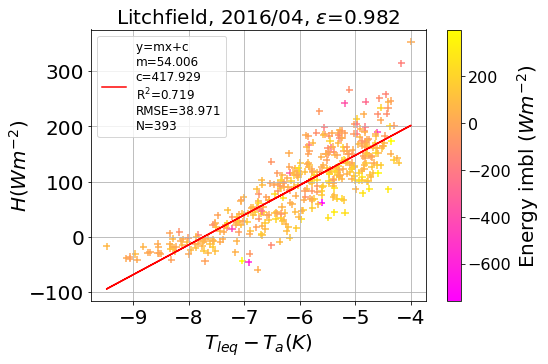

38.97129516440621
50.91227232771895


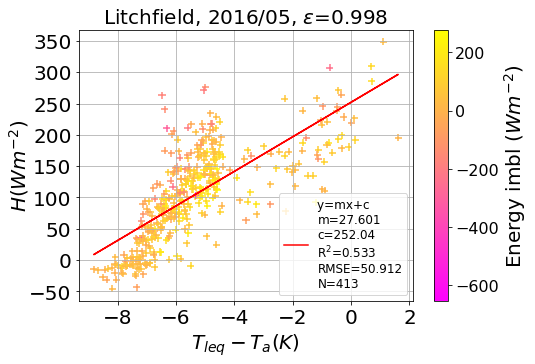

50.91227232771895
48.841232781282024


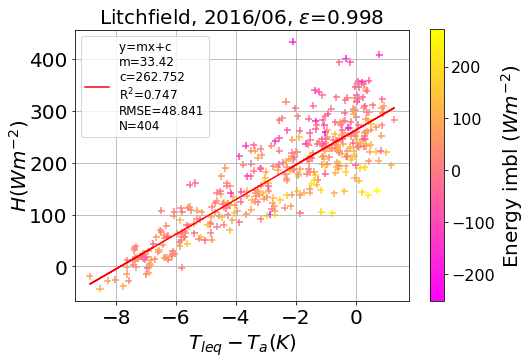

48.841232781282024
49.932162997702406


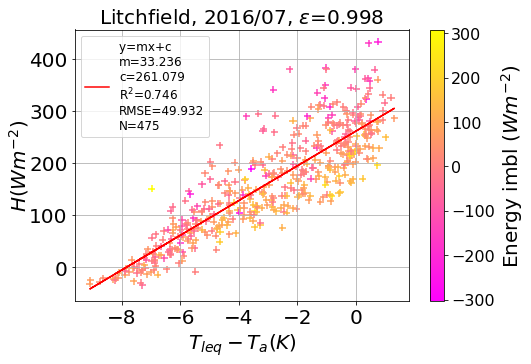

49.932162997702406
50.71220439856908


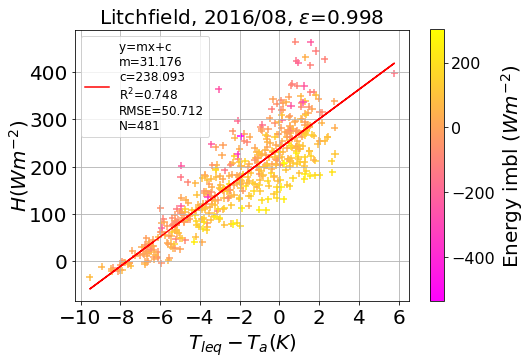

50.71220439856908
41.57146151219585


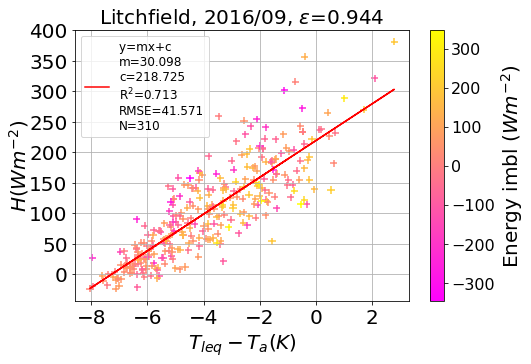

41.57146151219585
45.426795946080674


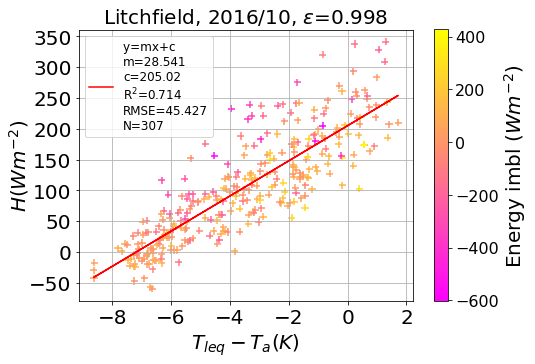

45.426795946080674
42.2156075254339


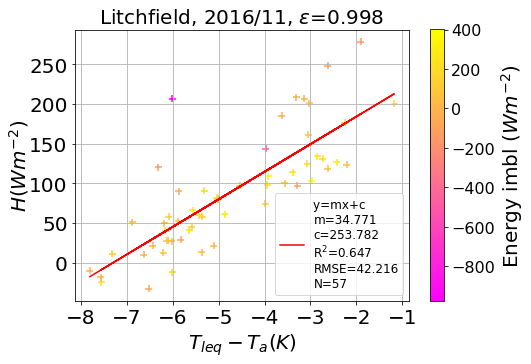

42.2156075254339
44.2542155371131


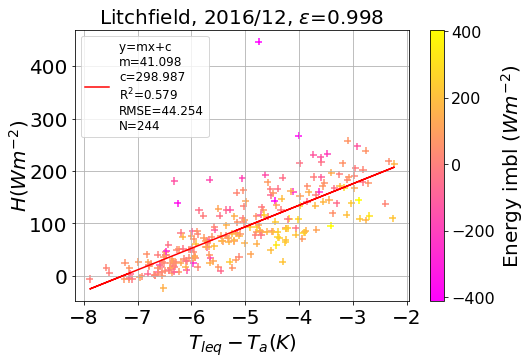

44.2542155371131
31.096117656819526


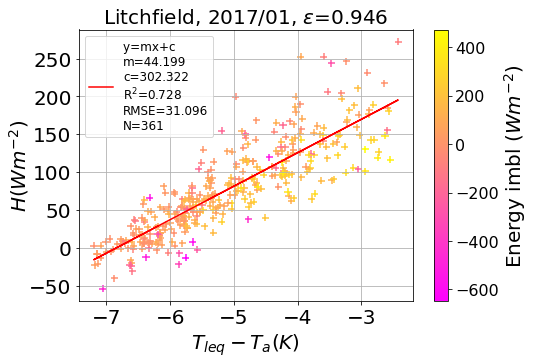

31.096117656819526
32.83131212048377


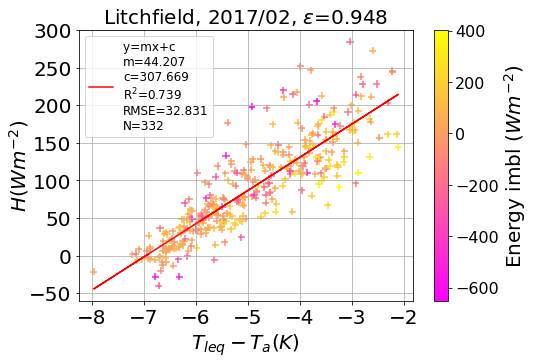

32.83131212048377
36.111303328205004


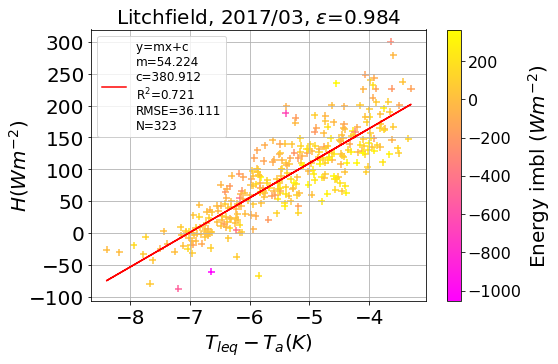

36.111303328205004
32.11436826231769


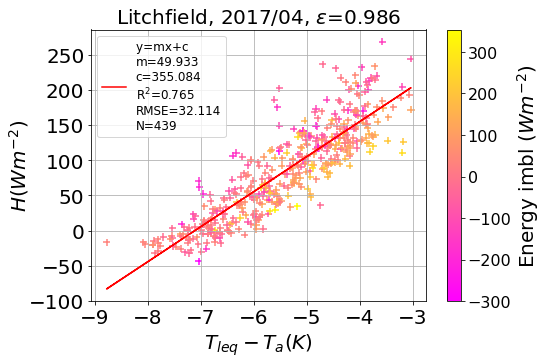

32.11436826231769
35.18030158056797


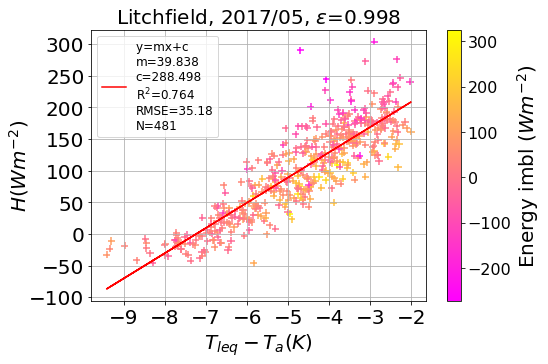

35.18030158056797
40.28427176091208


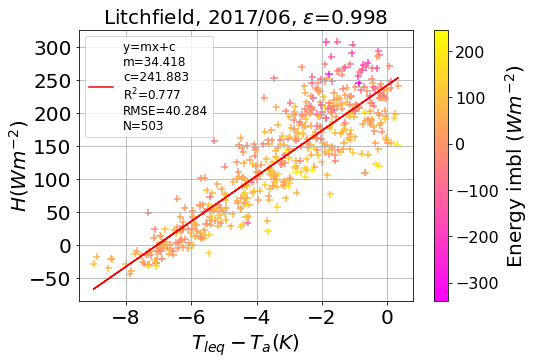

40.28427176091208
48.95120833037887


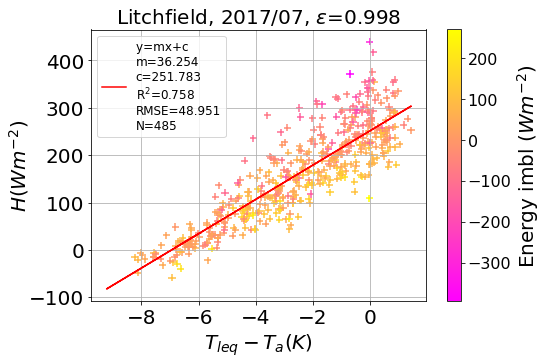

48.95120833037887
51.438371972841686


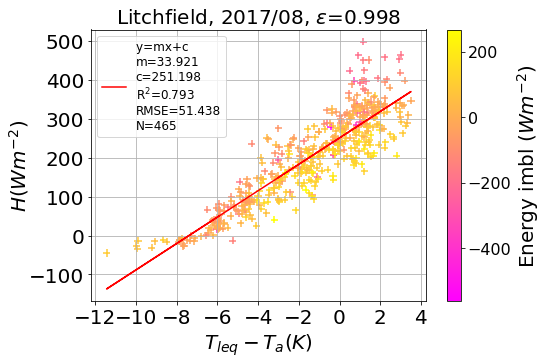

51.438371972841686
59.115812523258825


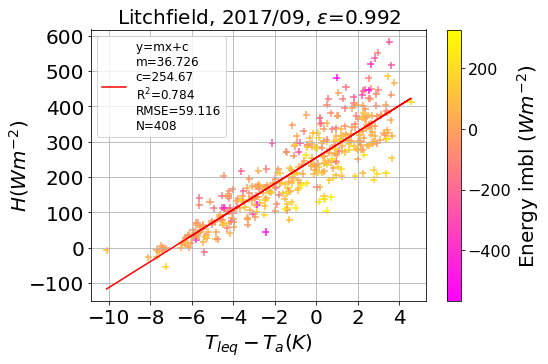

59.115812523258825
63.064625376957686


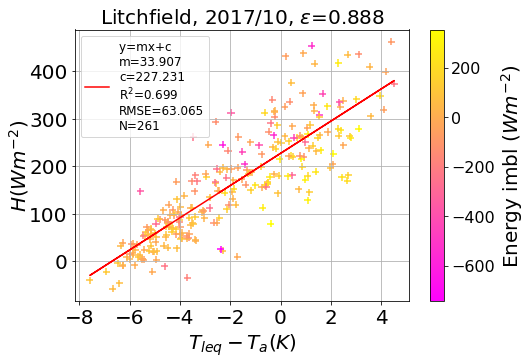

63.064625376957686
45.76766191721312


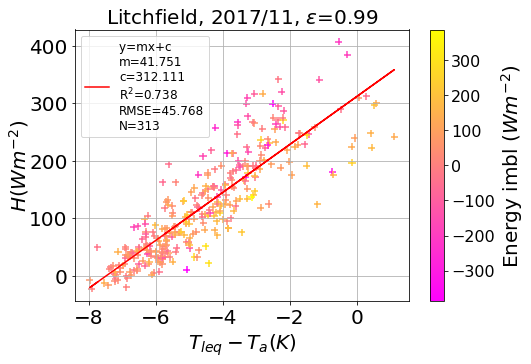

45.76766191721312
46.18125273480804


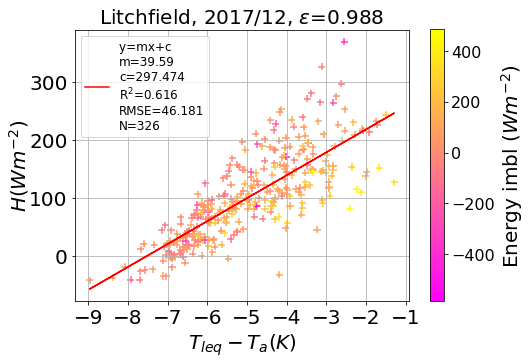

46.18125273480804
34.1322524620427


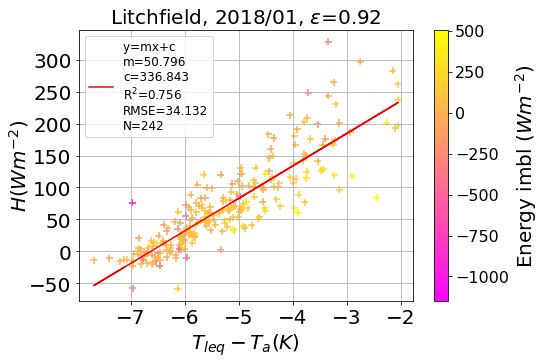

34.1322524620427
36.81762368835826


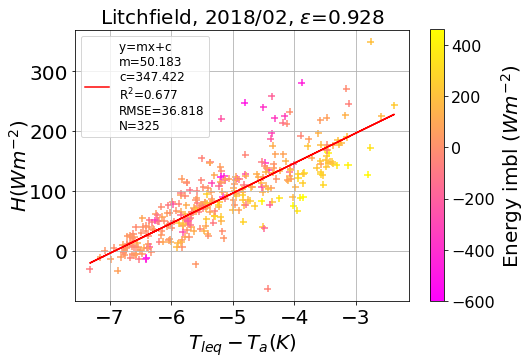

36.81762368835826
38.95018422319222


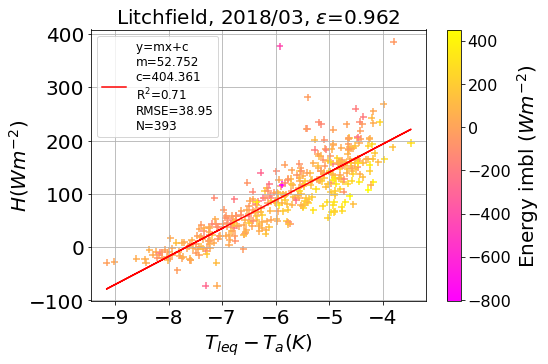

38.95018422319222
39.50414739440914


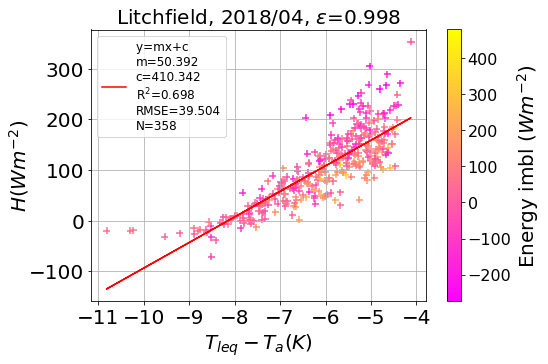

39.50414739440914
53.8734500835607


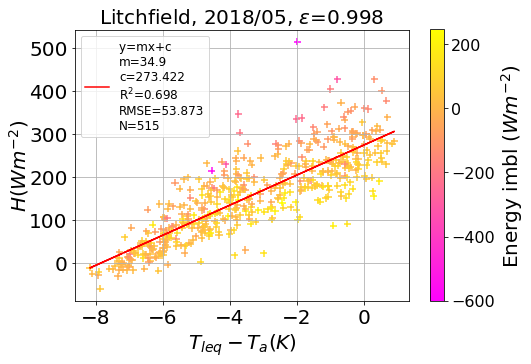

53.8734500835607
49.2351670531239


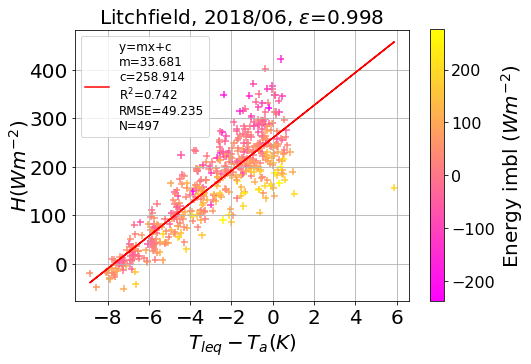

49.2351670531239
46.70547854553037


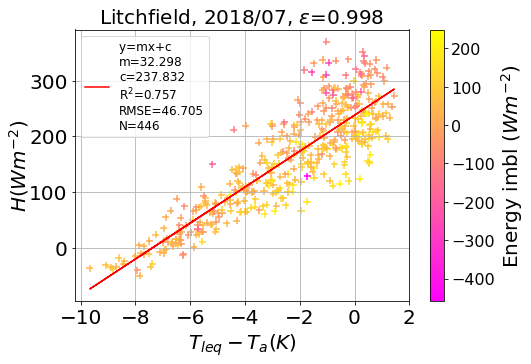

46.70547854553037
49.67645961418342


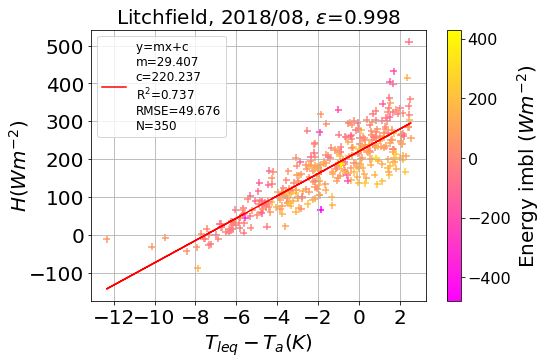

49.67645961418342
55.26430456230527


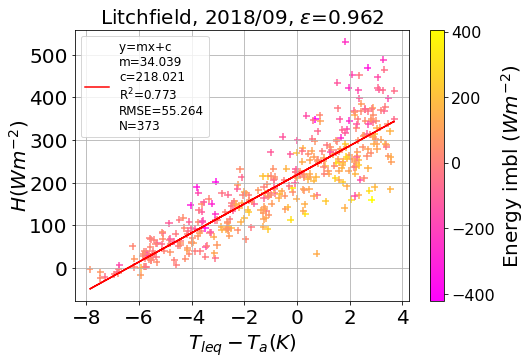

55.26430456230527
54.080102306475766


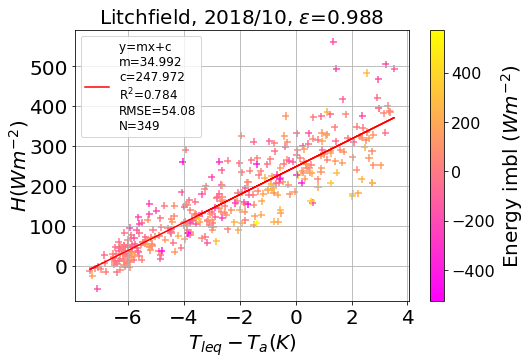

54.080102306475766
42.519149170632204


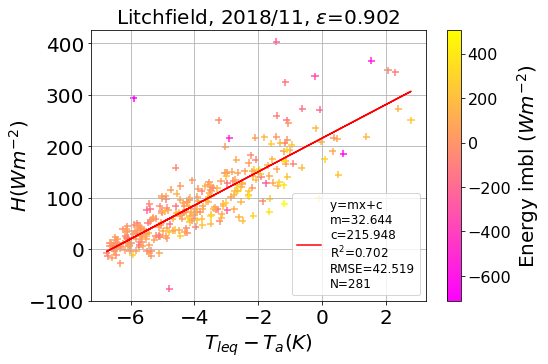

42.519149170632204
34.41576948051426


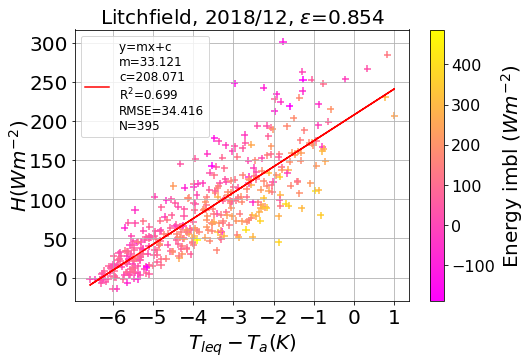

34.41576948051426


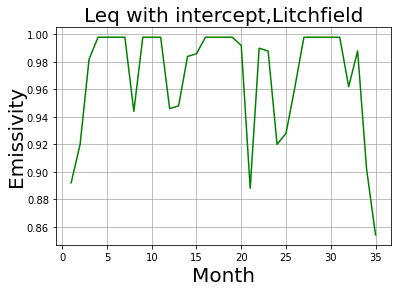

In [59]:
site="Litchfield"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_lf=[]
list_slope_lf=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_lf.append(opt_eps)
            list_slope_lf.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_lf.append(np.nan)
            list_slope_lf.append(np.nan)

eps_lf=np.array(list_opteps_lf)## converting into array
eps_lf=eps_lf[~np.isnan(eps_lf)]## removing nan
plt.plot(np.arange(len(eps_lf))+1,eps_lf[~np.isnan(eps_lf)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle =  'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

15.974552898229367


ValueError: 'c' argument has 298 elements, which is inconsistent with 'x' and 'y' with size 60.

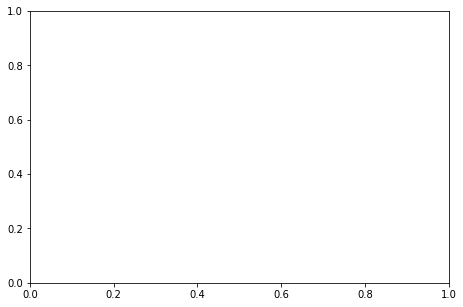

In [60]:
site="Brookings"
df=brookframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_br=[]
list_slope_br=[]
for yr in range(2005,2007):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_br.append(opt_eps)
            list_slope_br.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_br.append(1)
            list_slope_br.append(np.nan)

plt.plot(np.arange(len(list_opteps_br))+1,list_opteps_br,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'Leq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Yatir

In [ ]:
site="Yatir"
df=yatframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_ya=[]
list_slope_ya=[]
for yr in range(2005,2007): ## we got data just for one year
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_ya.append(opt_eps)
            list_slope_ya.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_ya.append(1)
            list_slope_ya.append(np.nan)

plt.plot(np.arange(len(list_opteps_ya))+1,list_opteps_ya,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'Leq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
from matplotlib.ticker import LinearLocator

## Adelaide River:

In [ ]:
site="Adelaide river"
df=arframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_ar=[]
list_slope_ar=[]
for yr in range(2007,2009):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_ar.append(opt_eps)
            list_slope_ar.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_ar.append(1)
            list_slope_ar.append(np.nan)

plt.plot(np.arange(len(list_opteps_ar))+1,list_opteps_ar,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'Leq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

# Short equation:

In [ ]:
def opteps_ols_ign(years, df_all,mnth,xcol = 'DT1', ycol = 'Fh',
                       epsmin=0.4, epsmax=0.995, epsincr=0.005, eqdigits=3):
    
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)]
         #&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                #&(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    for j in range(len(epsilon1)) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        ##########
        list_T_s12 = tf_T_s12(df12.Flu)
        df12 = df12.assign(T_s12=list_T_s12)
        list_H = df.Fh
        list_DT1 = df.T_s1 - df.T_a
        df = df.assign(DT1=(df.T_s1 - df.T_a))
        list_DT12 = df12.T_s12 - df12.T_a
        df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
        try:
            
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
                 opteps_As.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As.loc[k]=[np.nan, np.nan, 1, r2]   
            
        k=k+1
        
    
    df_eps= opteps_As.copy()
    
    df_eps.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps.eps.iloc[0],df_eps.m.iloc[0]
        
       

In [ ]:
opteps_ols_ign(2005,brookframe,8)

In [ ]:
def opteps_months_ign (site,years, df_all,mnth,epsilon1,xcol = 'DT1', ycol = 'Fh' , eqdigits=3):
    """Plot a panel per month with H and delT."""
    
    
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)&(df_all.Fn > 25) & (df_all.Ws > 2)]
    
         
    
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
    tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
    list_T_s1 = tf_T_s1(df.Flu)
    df = df.assign(T_s1=list_T_s1)
        ##########
    list_T_s12 = tf_T_s12(df12.Flu)
    df12 = df12.assign(T_s12=list_T_s12)
    list_H = df.Fh
    list_DT1 = df.T_s1 - df.T_a
    df = df.assign(DT1=(df.T_s1 - df.T_a))
    list_DT12 = df12.T_s12 - df12.T_a
    df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x+c
    
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x+c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(c,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
       
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))#.format(list_months))
    plt.plot(df12.DT12,df12.Fh,".k",label='_nolegend_')
    plt.xlabel(r'$T_{seq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H(W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0},{1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    
        
    plt.xticks([-5,0,5,10,15],fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(0, 15)
    plt.ylim(0, 500)
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="best", fontsize=12)
    plt.grid()
    plt.show()
        
        

##  Adelaide River

In [ ]:
site="Adelaide river"
df=arframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_ar=[]
optslp_ign_ar=[]
for yr in range(2007,2009):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign(yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_ar.append(opt_eps)
            opteps_ign_ar.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_ar.append(1)
            optslp_ign_ar.append(np.nan)

plt.plot(np.arange(len(opteps_ign_ar))+1,opteps_ign_ar,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Brookings

In [ ]:
site="Brookings"
df=brookframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_br=[]
optslp_ign_br=[]
for yr in range(2005,2007):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_br.append(opt_eps)
            optslp_ign_br.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_br.append(1)
            optslp_ign_br.append(np.nan)

plt.plot(np.arange(len(opteps_ign_br))+1,opteps_ign_br,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx_c'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Yatir

In [ ]:
site="Yatir"
df=yatframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_ya=[]
optslp_ign_ya=[]
for yr in range(2005,2006):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_ya.append(opt_eps)
            optslp_ign_ya.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_ya.append(1)
            optslp_ign_ya.append(np.nan)

plt.plot(np.arange(len(opteps_ign_ya))+1,opteps_ign_ya,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Alice Springs

In [ ]:
site="Alice Springs"
df=asframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_as=[]
optslp_ign_as=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_as.append(opt_eps)
            optslp_ign_as.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_as.append(1)
            optslp_ign_as.append(np.nan)

plt.plot(np.arange(len(opteps_ign_as))+1,opteps_ign_as,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Howard Springs

In [ ]:
site="Howard spring"
df=hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_hs=[]
optslp_ign_hs=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_hs.append(opt_eps)
            optslp_ign_hs.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_hs.append(1)
            optslp_ign_hs.append(np.nan)

plt.plot(np.arange(len(opteps_ign_hs))+1,opteps_ign_hs,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Tumbarumba

In [ ]:
site="Tumbarumba"
df=tumframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_tum=[]
optslp_ign_tum=[]
for yr in range(2015,2017):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_hs.append(opt_eps)
            optslp_ign_hs.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_hs.append(1)
            optslp_ign_hs.append(np.nan)

plt.plot(np.arange(len(opteps_ign_hs))+1,opteps_ign_hs,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Litchfield

In [ ]:
site="Litchfield"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_lf=[]
optslp_ign_lf=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_lf.append(opt_eps)
            optslp_ign_lf.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_lf.append(1)
            optslp_ign_lf.append(np.nan)

plt.plot(np.arange(len(opteps_ign_lf))+1,opteps_ign_lf,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Sturt Plains

In [ ]:
site="Sturt Plains"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_sp=[]
optslp_ign_sp=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_sp.append(opt_eps)
            optslp_ign_sp.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_sp.append(1)
            optslp_ign_sp.append(np.nan)

plt.plot(np.arange(len(opteps_ign_sp))+1,opteps_ign_sp,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Titree

In [ ]:
site="Titree"
df=titreeframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_tt=[]
optslp_ign_tt=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_tt.append(opt_eps)
            optslp_ign_tt.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_tt.append(1)
            optslp_ign_tt.append(np.nan)

plt.plot(np.arange(len(opteps_ign_tt))+1,opteps_ign_tt,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mxc{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Dalyuncleared

In [ ]:
site="Dalyuncleared"
df=dalyuncframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_du=[]
optslp_ign_du=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_du.append(opt_eps)
            optslp_ign_du.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_du.append(1)
            optslp_ign_du.append(np.nan)

plt.plot(np.arange(len(opteps_ign_du))+1,opteps_ign_du,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx+c{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

# Adding 40 watt to Rlup

In [ ]:
def opteps_rlup (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    k=0
    epsilon1=np.arange(0.4,1,0.002).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years) & (df_all.index.month == mnth)& 
                (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
        tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        list_T_s = tf_T_s(df.Fld,df.Flu+40)
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_rlm.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_rlm.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
        
        
    df_eps_ref=opteps_rlm.copy()## copying data frame for sorting based on minimum rmse
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0])
        
            

In [ ]:
def opteps_rlup_monthly (site,years, df_all,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    
   
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth) 
                & (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn<25) | (df_all.Ws < 2))]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
    tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        
        
    list_T_s = tf_T_s(df.Fld,df.Flu+40)
    list_T_s2 = tf_T_s2(df12.Fld,df12.Flu+40)
    df = df.assign(T_s=list_T_s)
    list_H = df.Fh
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    df12 = df12.assign(T_s2=list_T_s2)
    list_DT2 = df12.T_s2 - df12.T_a
    df12 = df12.assign(DT2=(df12.T_s2 - df12.T_a))#
   
   
        ####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    #####
    reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x + c
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=mx+c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}'.format(str(np.round(m,decimals=eqdigits)),
                                                                  str(np.round(c,decimals=eqdigits)),       
                                                                  str(np.round(r2,decimals=eqdigits)),
                                                                  str(np.round(RMSE, decimals=eqdigits)),
                                                                  str(np.round(N, decimals=eqdigits)))

        
        
    #plt.scatter(x=x, y=y, marker="o",s = 50, c=df1['Wd'],vmin=0,vmax=360, cmap="hsv")
    #cbar=plt.colorbar(label="wind direction", orientation="vertical")
    #cbar.set_ticks([0,45,90,130,180,225,270,315,360])
    #cbar.set_ticklabels([0,45,90,130,180,225,270,315,360]) 
    
    ##################################
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(7.5, 5)
    plt.scatter(x=x, y=y, marker="+",s = 50, c=df['en_imb']+40, cmap="spring") #,vmin=min(c),vmax=max(c)
    cbar1=plt.colorbar(label="Energy imbl $(W m^{-2})$",orientation="vertical")#.set_label(label="Energy imbl $(W m^{-2})$",size=20)
    cbar1.ax.tick_params(labelsize=16) 
    cbar1.ax.yaxis.label.set_size(fontsize=20) 
    
    
    #plt.plot(df12.DT2,df12.Fh,".k",label='_nolegend_')
    plt.plot(x,y_pred, color='blue',label=legendtext)# predicted
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0}, {1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    #plt.xticks([-5,-0,5,10],fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    #plt.xlim(-8, 10)
    #plt.ylim(-100, 630)
    plt.legend(loc="best",fontsize=14)
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

In [ ]:
opt_eps=opteps_rlup (2016, hsframe,8)[0]
opteps_rlup_monthly ('Howard Springs',2016, hsframe,8,opt_eps)

In [ ]:
opt_eps=opteps_rlup (2016, lfframe,8)[0]
opteps_rlup_monthly ('Litchfield',2016, lfframe,8,opt_eps)

In [ ]:
site="Howard Springs"
df=hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_hs_rlup=[]
optslp_hs_rlup=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_rlup (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_hs_rlup.append(opt_eps)
            optslp_hs_rlup.append(slope)
            opteps_rlup_monthly(site,yr,df,mnth,opt_eps)
        else:
            opteps_hs_rlup.append(1)
            optslp_hs_rlup.append(np.nan)

plt.plot(np.arange(len(opteps_hs_rlup))+1,opteps_hs_rlup,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq_rlup(H=mx){0}'.format(str(site))
fname = 'leq_rlup{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

# HDT_close energy balance:

In [ ]:
def opteps_ebc (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    k=0
    epsilon1=np.arange(0.4,1,0.002).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years) & (df_all.index.month == mnth)& 
                (df_all.Fn > 25) & (df_all.Ws > 2)& (df_all.en_imb > -50) & (df_all.en_imb < 50)]
    
    
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
       
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_rlm.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_rlm.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
        
        
    df_eps_ref=opteps_rlm.copy()## copying data frame for sorting based on minimum rmse
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0])
        
            

In [ ]:
def opteps_ebc_monthly (site,years, df_all,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    
   
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth) 
                & (df_all.Fn > 25) & (df_all.Ws > 2)& (df_all.en_imb > -50) & (df_all.en_imb < 50)]
    
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn<25) | (df_all.Ws < 2))]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
    tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        
        
    list_T_s = tf_T_s(df.Fld,df.Flu)
    list_T_s2 = tf_T_s2(df12.Fld,df12.Flu)
    df = df.assign(T_s=list_T_s)
    list_H = df.Fh
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    df12 = df12.assign(T_s2=list_T_s2)
    list_DT2 = df12.T_s2 - df12.T_a
    df12 = df12.assign(DT2=(df12.T_s2 - df12.T_a))#
   
   
        ####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    #####
    reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x + c
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x+c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}'.format(str(np.round(m,decimals=eqdigits)),
                                                                  str(np.round(c,decimals=eqdigits)),       
                                                                  str(np.round(r2,decimals=eqdigits)),
                                                                  str(np.round(RMSE, decimals=eqdigits)),
                                                                  str(np.round(N, decimals=eqdigits)))

        
        
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(7.5, 5)
    plt.scatter(x=x, y=y, marker="+",s = 50, c=df1['en_imb'], cmap="spring") #,vmin=min(c),vmax=max(c)
    cbar1=plt.colorbar(label="Energy imbl $(W m^{-2})$",orientation="vertical")#.set_label(label="Energy imbl $(W m^{-2})$",size=20)
    cbar1.ax.tick_params(labelsize=16) 
    cbar1.ax.yaxis.label.set_size(fontsize=20) 
    #plt.scatter(x=x, y=y, marker="o",s = 50, c=df1['en_imb'],vmin=-50,vmax=50, cmap="spring")
    #cbar1=plt.colorbar(label="Energy imbl", orientation="vertical")
    #cbar1.set_ticks([-50,-40,-30,-20,-10,0,10,20,30,40,50])
    #cbar1.set_ticklabels([-50,-40,-30,-20,-10,0,10,20,30,40,50])
    #plt.plot(x,y_pred, color='blue',label=legendtext)   
    #plt.plot(x,y,"+",label='_nolegend_')
    #plt.plot(df12.DT2,df12.Fh,".k",label='_nolegend_')
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0},{1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.xlim(-5, 17)
    #plt.ylim(-50, 700)
    plt.legend(loc="best",fontsize=12)
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

In [ ]:
opteps_ebc_monthly ('Howard Springs',2016, hsframe,8,0.998)

In [ ]:
site="Howard Springs"
df=hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_hs_ebc=[]
optslp_hs_ebc=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ebc (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_hs_ebc.append(opt_eps)
            optslp_hs_ebc.append(slope)
            opteps_ebc_monthly(site,yr,df,mnth,opt_eps)
        else:
            opteps_hs_ebc.append(1)
            optslp_hs_ebc.append(np.nan)

plt.plot(np.arange(len(opteps_hs_ebc))+1,opteps_hs_ebc,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq_rlup(H=mx){0}'.format(str(site))
fname = 'leq_mx_ebc'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
site='Howard Spring'
plt.figure(figsize=(15,7))
plt.tight_layout()
df=hsframe[(hsframe.index.year==2016)&(hsframe.index.month==8)&(hsframe.Fn>50)]
plt.plot(df.index,df.en_imb+40,'*',color='grey',label=r'eng_imb')  #&(asframe.index.month<5

plt.plot(df.index,df.Fn,color='orange',label=r'Rn')        #&(lfframe.index.day==15)
plt.plot(df.index,df.Fh,color='red',label=r'H')
plt.plot(df.index,df.Fe,color='blue',label=r'LE')
plt.plot(df.index,df.Fg,color='yellow',label=r'G')
plt.plot(df.index,df.Flu,color='green',label=r'Rlup')
#plt.plot(df.index,df.Flu+40,'.',color='k',label=r'Rlup + 40')
#plt.axhspan(const-0.001,const+0.001,color='green',alpha=0.9, lw=1.2,ls='dotted')
#plt.text(9,0.87, "corrected Rlup =" + str(np.round(const,decimals=eqdigits)))

plt.grid()
plt.legend(loc='best')
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Timestamp', ha='center',fontsize=20)
plt.ylabel(r'Observed fluxes ($ W m^{-2}$)', labelpad=10, va='center',fontsize=20)



plt.title ('Daily observed fluxes, {0}, {1}'.format(str(site),df.index[0].date().strftime('%Y/%m')), fontsize=20)

# Bowen ration closure

In [ ]:
df=hsframe.copy()
Beta = (df.Fh)/(df.Fe)
df["beta"] = Beta

dLE=((df.Fsd + df.Fld - ((df.Flu+40) + df.Fsu))- df.Fg - (1+ df.beta)*df.Fe)/(1+ df.beta) # Adding 40 watt to Rlup and closing energy balance
df["dLE"] = dLE
df["Fe_corr"] = df.dLE + df.Fe
df["dH"] = (df.dLE + df.Fe)* Beta - df.Fh
df["Fh_corr"] = df.Fh + df.dH
df["new_enimb"]=(df.Fsd + df.Fld - ((df.Flu+40) + df.Fsu))- (df.Fh_corr+df.Fe_corr+df.Fg)


#lfframe["en_imb1"] = (lfframe.Fsd + lfframe.Fld - (lfframe.Fsu + lfframe.Fsd))- (lfframe.Fh+lfframe.Fe+lfframe.Fg)

df_hs_ebc=df.copy()
###
## the new energy imbalance after applying correction :




In [ ]:
def opteps_ebc (years, df_all,rlup_cor,mnth,xcol = 'DT', ycol = 'Fh_corr', eqdigits=3):
    opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    k=0
    epsilon1=np.arange(0.4,1,0.002).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years) & (df_all.index.month == mnth)& 
                (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], 
                                 dims={R_lin:1,R_lout:1},on_unused_input='ignore')
                                                       
        
        
        
        list_T_s = tf_T_s(df.Fld,df.Flu+rlup_cor)  ## Add 40  watt for ebc and rlup bias correction
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh_corr
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_rlm.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_rlm.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
        
        
    df_eps_ref=opteps_rlm.copy()## copying data frame for sorting based on minimum rmse
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0])
        
            

In [ ]:
def monthly_ebc (site,years, df_all,mnth,epsilon1,rlup_cor,xcol = 'DT', ycol = 'Fh_corr', eqdigits=3):
    
   
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth) 
                & (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn<25) | (df_all.Ws < 2))]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1,
                                                                                              
                                                                R_lout:1},on_unused_input='ignore')
                                                       
        
        
   
    list_T_s = tf_T_s(df.Fld,df.Flu+rlup_cor)  # ## Add 40  watt for ebc and rlup bias correction
    df = df.assign(T_s=list_T_s)
    list_H = df.Fh_corr
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    
   
   
        ####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    #####
    reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x + c
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=mx+c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}'.format(str(np.round(m,decimals=eqdigits)),
                                                                  str(np.round(c,decimals=eqdigits)),       
                                                                  str(np.round(r2,decimals=eqdigits)),
                                                                  str(np.round(RMSE, decimals=eqdigits)),
                                                                  str(np.round(N, decimals=eqdigits)))

        
        
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(7.5, 5)
    plt.scatter(x=x, y=y, marker="+",s = 50, c=df['new_enimb'], cmap="spring") #,vmin=min(c),vmax=max(c)
    cbar1=plt.colorbar(label="Energy imbl $(W m^{-2})$",orientation="vertical")#.set_label(label="Energy imbl $(W m^{-2})$",size=20)
    cbar1.ax.tick_params(labelsize=16) 
    cbar1.ax.yaxis.label.set_size(fontsize=20)    
    #plt.plot(x,y,"+",label='_nolegend_')
    #plt.plot(df12.DT2,df12.Fh,".k",label='_nolegend_')
    plt.plot(x,y_pred, color='blue',label=legendtext)# predicted
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0}, {1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    #plt.xticks([-6,-3,0,3,6,9,12],fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    #plt.xlim(-8, 10)
    #plt.ylim(-100, 630)
    plt.legend(loc="best",fontsize=12)
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

In [ ]:
opt_eps=opteps_ebc (2016, df_hs_ebc,8,40)[0]
monthly_ebc ("Howard Springs",2016,df_hs_ebc,8,opt_eps,40) ## using new energy imbalance

## New bowen ratio by adding 8% of Rlup

In [ ]:
df=hsframe.copy()
Beta = (df.Fh)/(df.Fe)
df["beta"] = Beta

dLE=((df.Fsd + df.Fld - ((df.Flu+0.08*(df.Flu)) + df.Fsu))- df.Fg - (1+ df.beta)*df.Fe)/(1+ df.beta) # Adding 40 watt to Rlup and closing energy balance
df["dLE"] = dLE
df["Fe_corr"] = df.dLE + df.Fe
df["dH"] = (df.dLE + df.Fe)* Beta - df.Fh
df["Fh_corr"] = df.Fh + df.dH
df["new_enimb"]=(df.Fsd + df.Fld - ((df.Flu+0.08*(df.Flu)) + df.Fsu))- (df.Fh_corr+df.Fe_corr+df.Fg)


#lfframe["en_imb1"] = (lfframe.Fsd + lfframe.Fld - (lfframe.Fsu + lfframe.Fsd))- (lfframe.Fh+lfframe.Fe+lfframe.Fg)

df_hs_ebc1=df.copy()

In [ ]:
#correction in upwelling longwave by adding percentage
#closing energy imbalance using Bowen ratio closure
#optimise the emissivity for each month
#if -20<c<20

def opteps_ebc1 (years,df_all,mnth,cor_per,xcol = 'DT', ycol = 'Fh_corr', eqdigits=3):
    opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2","c"])
    k=0
    epsilon1=np.arange(0.4,1,0.002).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years) & (df_all.index.month == mnth)& 
                (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    ## energy balance closure
    Beta = (df.Fh)/(df.Fe)
    df["beta"] = Beta

    dLE=((df.Fsd + df.Fld - ((df.Flu+cor_per*(df.Flu)) + df.Fsu))- df.Fg - (1+ df.beta)*df.Fe)/(1+ df.beta) # Adding 40 watt to Rlup and closing energy balance
    df["dLE"] = dLE
    df["Fe_corr"] = df.dLE + df.Fe
    df["dH"] = (df.dLE + df.Fe)* Beta - df.Fh
    df["Fh_corr"] = df.Fh + df.dH
    df["new_enimb"]=(df.Fsd + df.Fld - ((df.Flu+cor_per*(df.Flu)) + df.Fsu))- (df.Fh_corr+df.Fe_corr+df.Fg)

    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], 
                                 dims={R_lin:1,R_lout:1},on_unused_input='ignore')
                                                       
        
        
        
        list_T_s = tf_T_s(df.Fld,df.Flu+cor_per*(df.Flu))  ## Add 40  watt for ebc and rlup bias correction
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh_corr
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_rlm.loc[k]=[RMSE, m, epsilon1[j], r2,c]
        else:
            opteps_rlm.loc[k]=[np.nan, np.nan, 1, r2,c]
        k=k+1
        
        
        
    df_eps_ref=opteps_rlm.copy()## copying data frame for sorting based on minimum rmse
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0])
        
            


In [ ]:
def monthly_ebc1 (site,years, df_all,mnth,epsilon1,cor_per,xcol = 'DT', ycol = 'Fh_corr', eqdigits=3):
    
   
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth) 
                & (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    Beta = (df.Fh)/(df.Fe)
    df["beta"] = Beta

    dLE=((df.Fsd + df.Fld - ((df.Flu+cor_per*(df.Flu)) + df.Fsu))- df.Fg - (1+ df.beta)*df.Fe)/(1+ df.beta) # Adding 40 watt to Rlup and closing energy balance
    df["dLE"] = dLE
    df["Fe_corr"] = df.dLE + df.Fe
    df["dH"] = (df.dLE + df.Fe)* Beta - df.Fh
    df["Fh_corr"] = df.Fh + df.dH
    df["new_enimb"]=(df.Fsd + df.Fld - ((df.Flu+cor_per*(df.Flu)) + df.Fsu))- (df.Fh_corr+df.Fe_corr+df.Fg)

   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1,
                                                                                              
                                                                R_lout:1},on_unused_input='ignore')
                                                       
        
        
   
    list_T_s = tf_T_s(df.Fld,df.Flu+ cor_per*(df.Flu))  # ## Add 40  watt for ebc and rlup bias correction
    df = df.assign(T_s=list_T_s)
    list_H = df.Fh_corr
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    
   
   
        ####
    df1 = df.dropna(subset=[xcol, ycol, 'new_enimb'])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    #####
    reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x + c
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=mx+c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}'.format(str(np.round(m,decimals=eqdigits)),
                                                                  str(np.round(c,decimals=eqdigits)),       
                                                                  str(np.round(r2,decimals=eqdigits)),
                                                                  str(np.round(RMSE, decimals=eqdigits)),
                                                                  str(np.round(N, decimals=eqdigits)))

        
        
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(7.5, 5)
    plt.scatter(x=x, y=y, marker="+",s = 50, c=df1['new_enimb'], cmap="spring") #,vmin=min(c),vmax=max(c)
    cbar1=plt.colorbar(label="Energy imbl $(W m^{-2})$",orientation="vertical")#.set_label(label="Energy imbl $(W m^{-2})$",size=20)
    cbar1.ax.tick_params(labelsize=16) 
    cbar1.ax.yaxis.label.set_size(fontsize=20)    
    #plt.plot(x,y,"+",label='_nolegend_')
    #plt.plot(df12.DT2,df12.Fh,".k",label='_nolegend_')
    plt.plot(x,y_pred, color='blue',label=legendtext)# predicted
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0}, {1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    #plt.xticks([-6,-3,0,3,6,9,12],fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    #plt.xlim(-8, 10)
    #plt.ylim(-100, 630)
    plt.legend(loc="best",fontsize=12)
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

In [ ]:
opt_eps=opteps_ebc1 (2017,hsframe,8,0.08)[0]
monthly_ebc1 ("Howard Springs",2017,hsframe,8,opt_eps,0.08)

opt_eps=opteps_ebc1 (2016, df_hs_ebc1,8)[0]
monthly_ebc1 ("Howard Springs",2016,df_hs_ebc1,8,opt_eps)

In [ ]:
opt_eps=opteps_ebc1 (2017, df_hs_ebc1,8)[0]
monthly_ebc1 ("Howard Springs",2017,df_hs_ebc1,8,opt_eps)

In [ ]:
opt_eps=opteps_ebc1 (2017, df_hs_ebc1,1,0.09)[0]
monthly_ebc1 ("Howard Springs",2017,df_hs_ebc1,1,opt_eps,0.09)

In [ ]:
opt_eps=opteps_ebc1 (2017, hsframe,2,0.09)[0]
monthly_ebc1 ("Howard Springs",2017,hsframe,2,opt_eps,0.09)

In [ ]:
opt_eps=opteps_ebc1 (2017, hsframe,3,0.08)[0]
monthly_ebc1 ("Howard Springs",2017,hsframe,3,opt_eps,0.08)

**Dry season at HS is from june to september**

In [ ]:
opt_eps=opteps_ebc1 (2016,hsframe,1,0.08)[0]
monthly_ebc1 ("Howard Springs",2016,hsframe,1,opt_eps,0.08)

In [ ]:
opt_eps=opteps_ebc1 (2017,hsframe,1,0.08)[0]
monthly_ebc1 ("Howard Springs",2017,hsframe,6,0.983,0.08)

# For all three years

In [ ]:
site="Howard Springs"
df=hsframe.copy()                       #hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_hs_ebc1=[]
optslp_hs_ebc1=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ebc1 (yr,df,mnth,0.08)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_hs_ebc1.append(opt_eps)
            optslp_hs_ebc1.append(slope)
            monthly_ebc1(site,yr,df,mnth,opt_eps,0.08)
            #monthly_ebc1 ("Howard Springs",2016,df_hs_ebc1,8,opt_eps)
        else:
            opteps_hs_ebc1.append(1)
            optslp_hs_ebc1.append(np.nan)

